# Carga de Datos

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as ss
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [165]:
google = pd.read_csv("/content/drive/MyDrive/extended_googleplaystore.csv")



---



---



---



#Visualización del dataset

In [166]:
google.head(10)

App  ...  Reviews_present_count
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...                      0
1                                Coloring book moana  ...                     44
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...                      0
3                              Sketch - Draw & Paint  ...                      0
4              Pixel Draw - Number Art Coloring Book  ...                      0
5                         Paper flowers instructions  ...                      0
6            Smoke Effect Photo Maker - Smoke Editor  ...                      0
7                                   Infinite Painter  ...                      0
8                               Garden Coloring Book  ...                     90
9                      Kids Paint Free - Drawing Fun  ...                      0

[10 rows x 23 columns]

In [167]:
#Tipos de datos, ¿cuántos objetos forman cada variable?¿Existen valores nulos?Qué tipo de valores forman las características?
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   App                                      9659 non-null   object 
 1   Category                                 9659 non-null   float64
 2   Rating                                   8196 non-null   float64
 3   Reviews                                  9659 non-null   int64  
 4   Size                                     8432 non-null   float64
 5   Installs                                 9659 non-null   float64
 6   Type                                     9659 non-null   float64
 7   Price                                    9659 non-null   float64
 8   Content Rating                           9659 non-null   object 
 9   Genres                                   9659 non-null   float64
 10  Last Updated                             9659 no

El objetivo de este trabajo es crear un algoritmo capaz de predecir el éxito de una aplicación. Como variable dependiente tomaremos la variable "Installs", que representa el número de descargas o intalaciones de una aplicación. El resto, serán consideradas como variables dependientes. 

Algunas de las variables dependientes, no tiene ningún impacto en la elección por parte del consumidor de una aplicación. Otras, están contenidas en otras de las variables. Todo esto podremos analizarlo en la matriz de correlación.

Además, haré una análisis univariable y bivariante, sobre todo, centrado en la variable "Installs" y en otras variables que ayuden a comprender mejor la caractéristica en estudio.



---



---



#Análisis Exploratorio de Datos

In [168]:
google.describe()

Category       Rating  ...  No_reviews_count  Reviews_present_count
count  9659.000000  8196.000000  ...       9659.000000            9659.000000
mean     16.760120     4.173243  ...          2.653173               3.719743
std       8.400732     0.536625  ...         12.469487              16.463267
min       0.000000     1.000000  ...          0.000000               0.000000
25%      11.000000     4.000000  ...          0.000000               0.000000
50%      14.000000     4.300000  ...          0.000000               0.000000
75%      25.000000     4.500000  ...          0.000000               0.000000
max      32.000000     5.000000  ...        240.000000             312.000000

[8 rows x 14 columns]

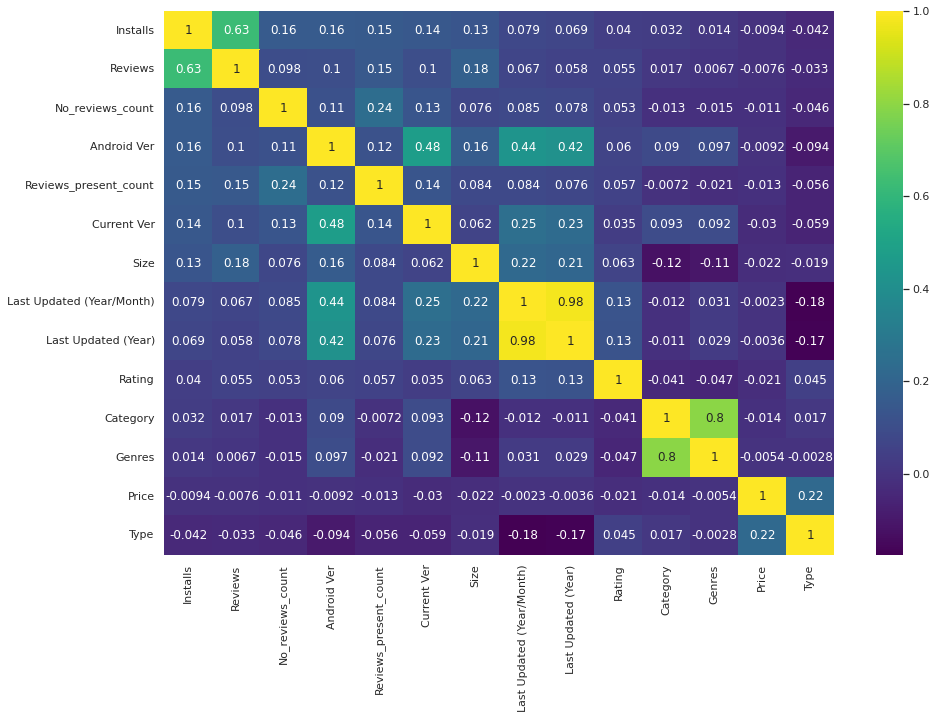

In [169]:
k = 22
cols = google.corr().nlargest(k, "Installs")["Installs"].index
cm = google[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True, cmap = "viridis")

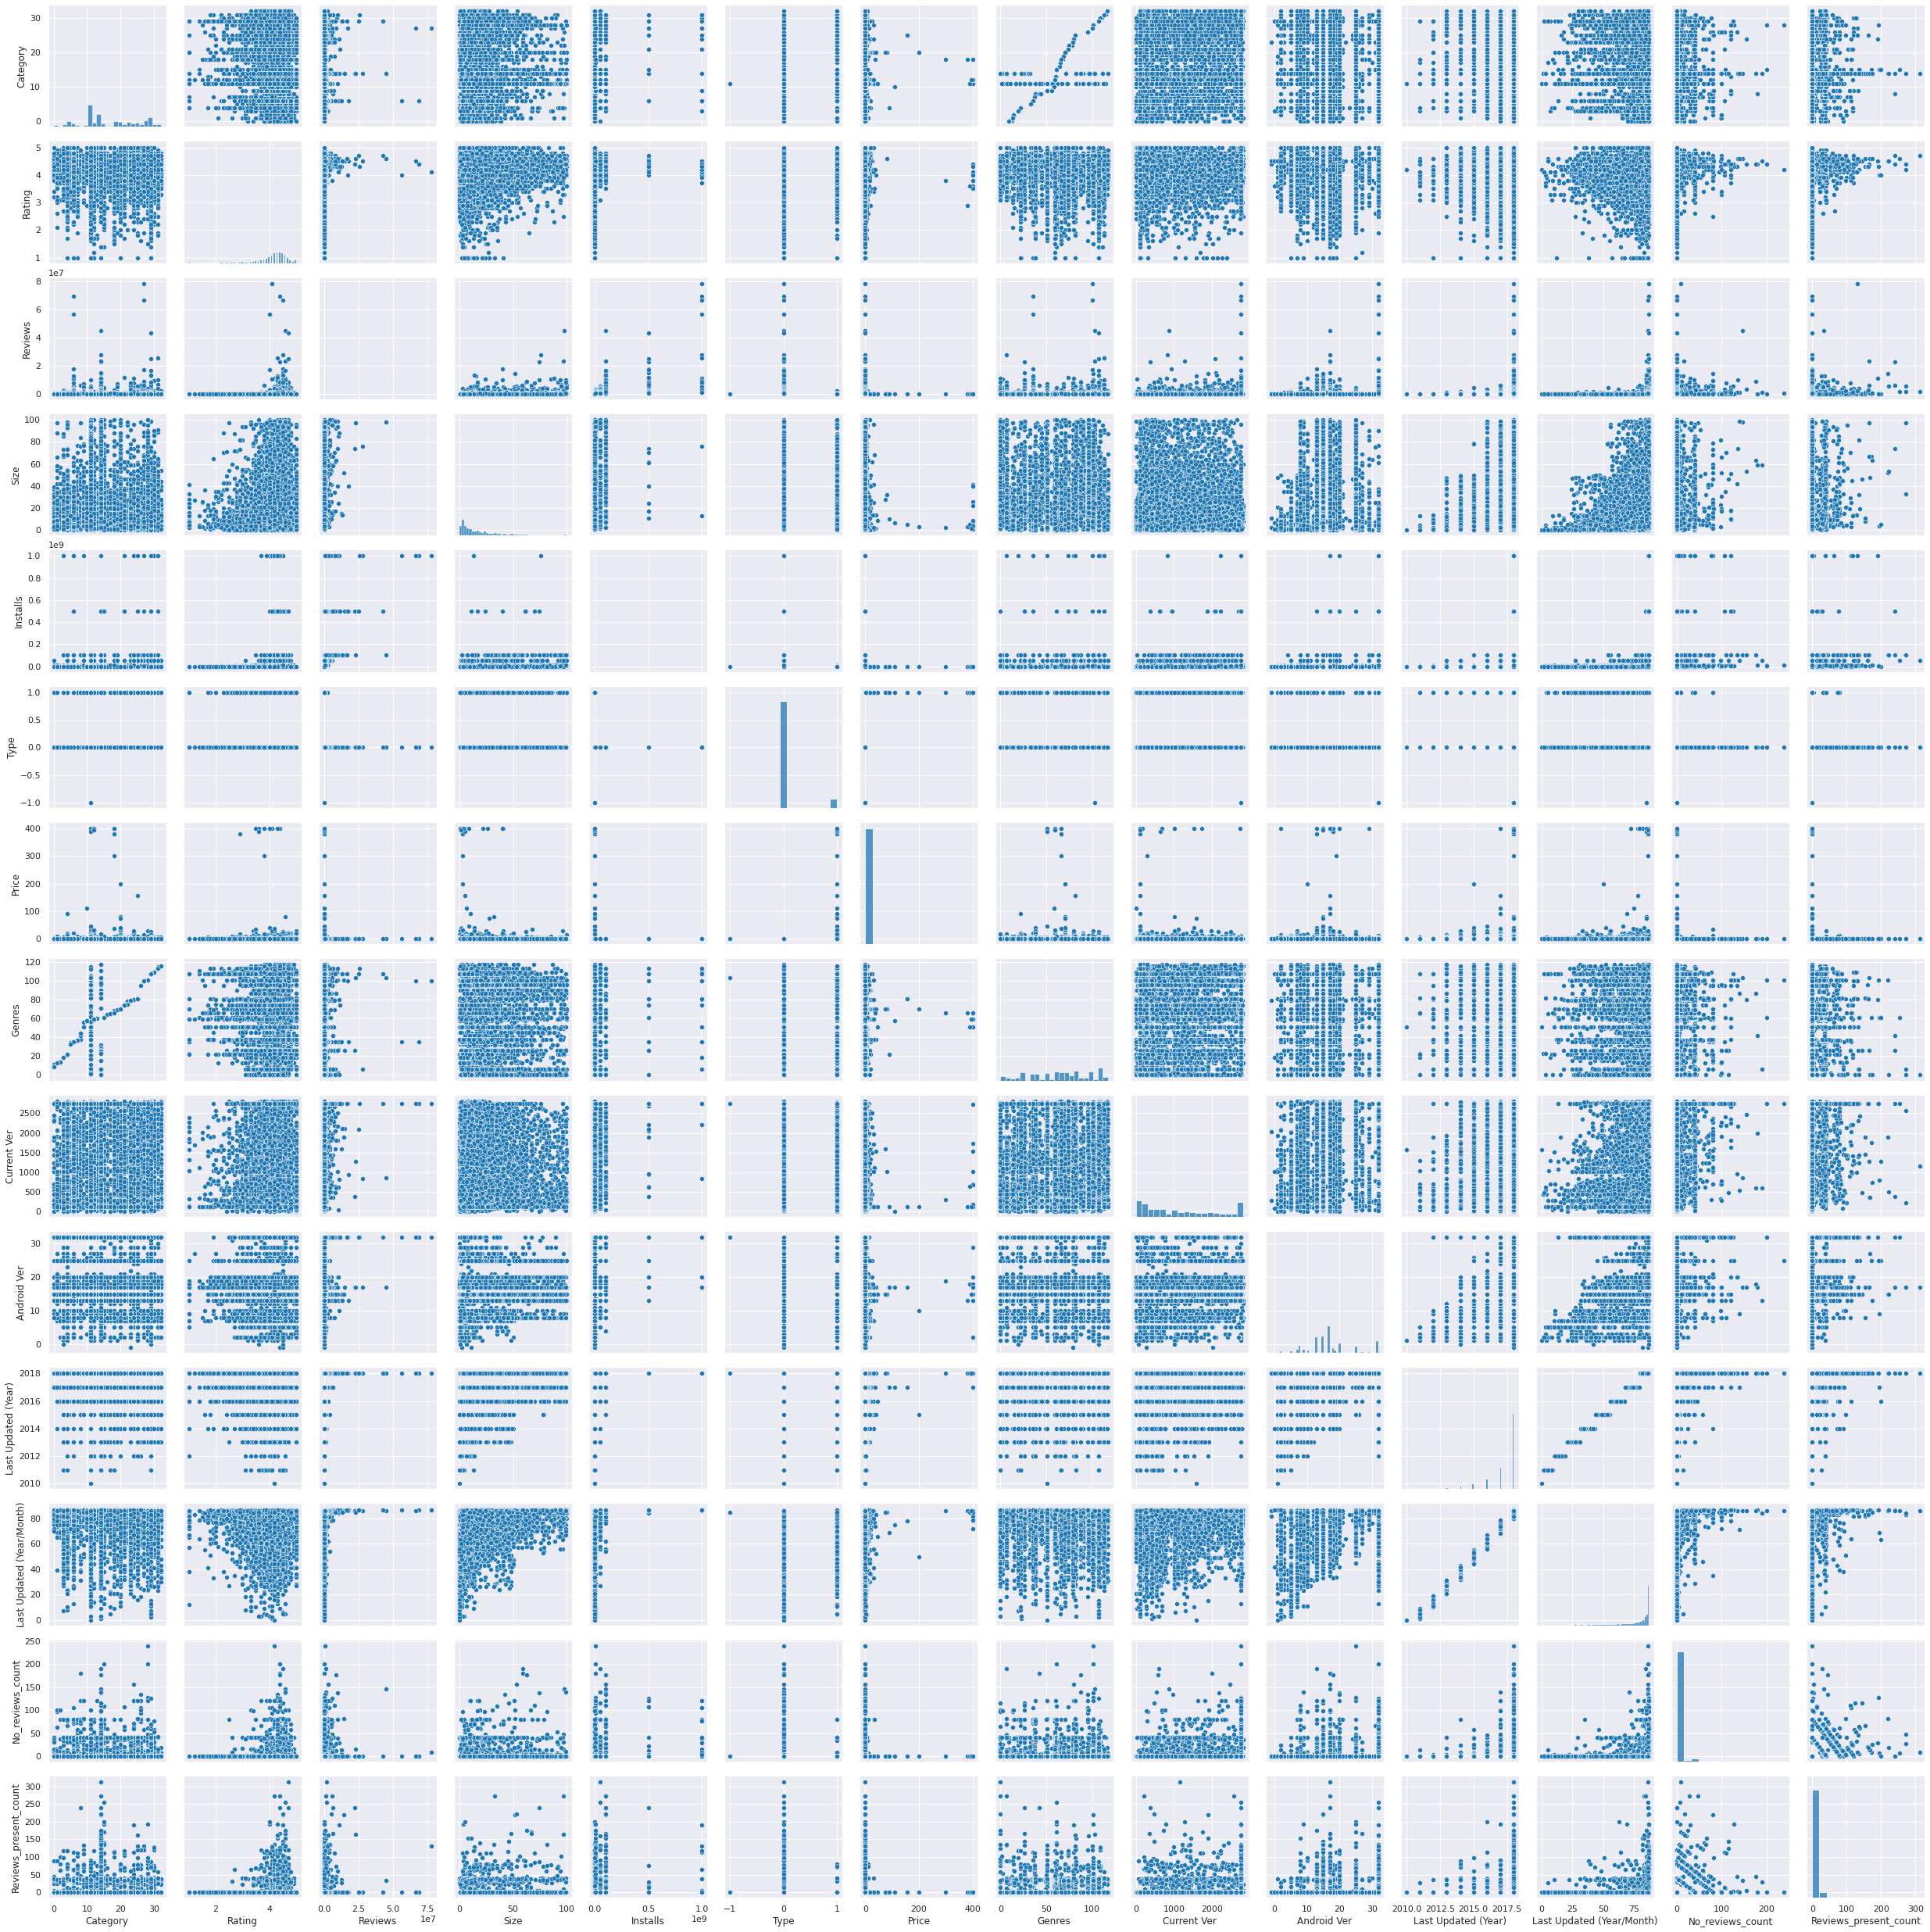

In [170]:
sns.pairplot(google)
plt.show()

##Análisis univariante


####Category

Categría es una característica categórica. Clasifica las aplicaciones por tema. Estos temas son 33. En este caso, a la variable "Category" se le asocia la variable "Category (categorical)", donde se representa de forma nominal el tema de la aplicación. 

In [171]:
categorias = google["Category (categorical)"]
u_categorias = categorias.unique()
len(u_categorias)
print(u_categorias)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [172]:
categorias_int = google["Category"]
u_categorias_int = categorias_int.unique()
print(u_categorias_int)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 12. 13. 15. 16. 17. 18. 14.
 11. 20. 27. 26. 24. 28. 30. 29. 23. 25. 22. 32. 31. 21. 19.]


In [173]:
df = pd.DataFrame({
    "ItemGroup": u_categorias_int,
    "ItemModule": u_categorias})
dic_categorias = df.groupby("ItemGroup")["ItemModule"].apply(list).to_dict()
dic_categorias

{0.0: ['ART_AND_DESIGN'],
 1.0: ['AUTO_AND_VEHICLES'],
 2.0: ['BEAUTY'],
 3.0: ['BOOKS_AND_REFERENCE'],
 4.0: ['BUSINESS'],
 5.0: ['COMICS'],
 6.0: ['COMMUNICATION'],
 7.0: ['DATING'],
 8.0: ['EDUCATION'],
 9.0: ['ENTERTAINMENT'],
 10.0: ['EVENTS'],
 11.0: ['FAMILY'],
 12.0: ['FINANCE'],
 13.0: ['FOOD_AND_DRINK'],
 14.0: ['GAME'],
 15.0: ['HEALTH_AND_FITNESS'],
 16.0: ['HOUSE_AND_HOME'],
 17.0: ['LIBRARIES_AND_DEMO'],
 18.0: ['LIFESTYLE'],
 19.0: ['MAPS_AND_NAVIGATION'],
 20.0: ['MEDICAL'],
 21.0: ['NEWS_AND_MAGAZINES'],
 22.0: ['PARENTING'],
 23.0: ['PERSONALIZATION'],
 24.0: ['PHOTOGRAPHY'],
 25.0: ['PRODUCTIVITY'],
 26.0: ['SHOPPING'],
 27.0: ['SOCIAL'],
 28.0: ['SPORTS'],
 29.0: ['TOOLS'],
 30.0: ['TRAVEL_AND_LOCAL'],
 31.0: ['VIDEO_PLAYERS'],
 32.0: ['WEATHER']}

Vamos a analizar más detenidamiente la variable "Category (categorical)".

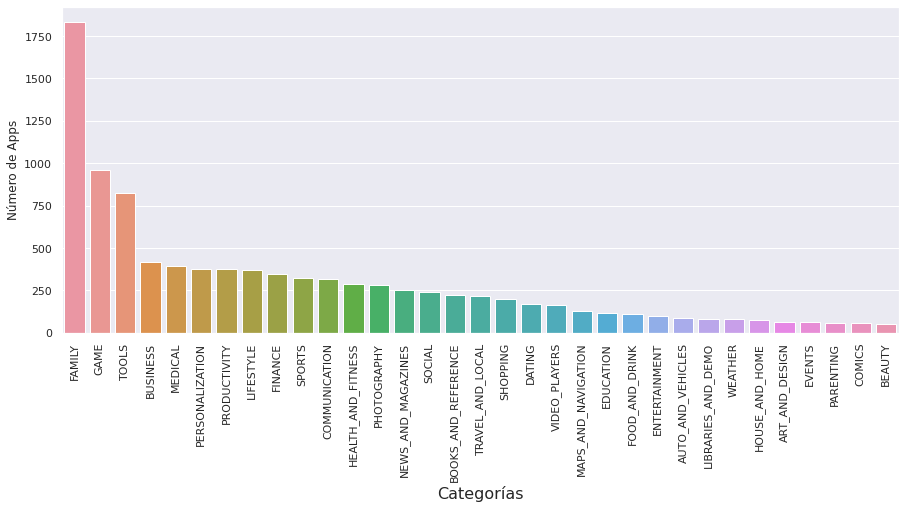

In [174]:
#Representación de las categorías en gráfico de barras:
categorias = google["Category (categorical)"]

sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Category (categorical)", data = google, order=categorias.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Categorías", fontsize = 16)
plt.ylabel("Número de Apps")

plt.show()

Podemos observar en el gráfico, que las categorías con un mayor número de aplicaciones en la Play Store son: "Family", "Game", "Tools", "Business" y "Medical". Para nuestro análisis, el número de aplicaciones no tiene demasiado impacto. Lo interesante es conocer las categorías de las aplicaciones más descargadas de la plataforma de Google.

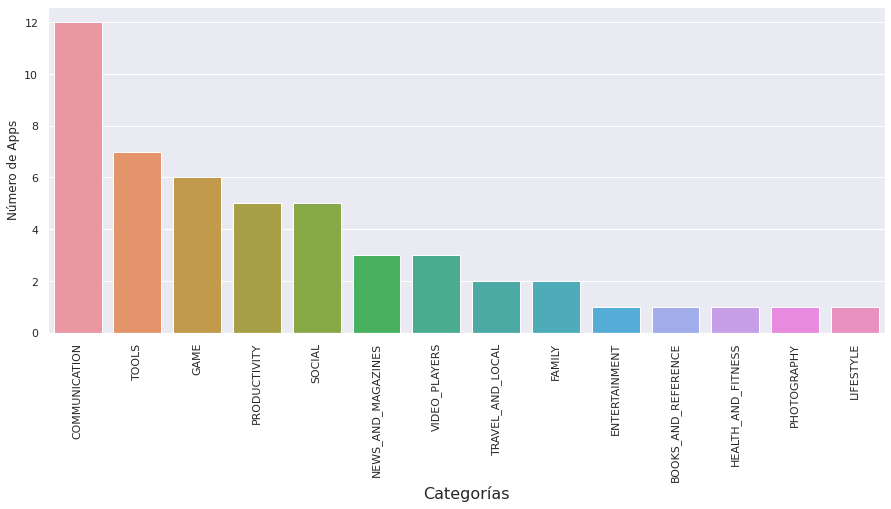

In [175]:
top_installs = google.sort_values(by = ["Installs"], ascending= False)
top_installs = top_installs.head(50)

sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Category (categorical)", data = top_installs, order=top_installs["Category (categorical)"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Categorías", fontsize = 16)
plt.ylabel("Número de Apps")

plt.show()

De las 50 aplicaciones más descargadas, 12 de las 50 pertenecen a la categoría de Comunicación. Completan el podio la categoría "Herramientas" y en tercer lugar "Juegos".

In [176]:
top_installs.loc[:,["App", "Category (categorical)"]]

App Category (categorical)
300                                  WhatsApp Messenger          COMMUNICATION
152                                   Google Play Books    BOOKS_AND_REFERENCE
1356                                     Subway Surfers                   GAME
2420                          Maps - Navigate & Explore       TRAVEL_AND_LOCAL
304                                               Gmail          COMMUNICATION
2003                                          Instagram                 SOCIAL
2002                                           Facebook                 SOCIAL
302                        Google Chrome: Fast & Secure          COMMUNICATION
2012                                            Google+                 SOCIAL
2908                                            YouTube          VIDEO_PLAYERS
2429                                 Google Street View       TRAVEL_AND_LOCAL
2507                                             Google                  TOOLS
2720                                       Google Drive           PRODUCTIVITY
701                                   Google Play Games          ENTERTAINMENT
2191                                      Google Photos            PHOTOGRAPHY
299            Messenger – Text and Video Chat for Free          COMMUNICATION
2977                                        Google News     NEWS_AND_MAGAZINES
2930                            Google Play Movies & TV          VIDEO_PLAYERS
349                       Skype - free IM & video calls          COMMUNICATION
305                                            Hangouts          COMMUNICATION
1410                                     My Talking Tom                   GAME
1364                                                Pou                   GAME
306                                     Viber Messenger          COMMUNICATION
2739                                            Dropbox           PRODUCTIVITY
1363                                       Temple Run 2                   GAME
311                       imo free video calls and chat          COMMUNICATION
2817                                        Cloud Print           PRODUCTIVITY
357                         LINE: Free Calls & Messages          COMMUNICATION
2996                       Flipboard: News For Our Time     NEWS_AND_MAGAZINES
335               Google Duo - High Quality Video Calls          COMMUNICATION
2980                                            Twitter     NEWS_AND_MAGAZINES
342         UC Browser - Fast Download Private & Secure          COMMUNICATION
2742                                    Google Calendar           PRODUCTIVITY
2946                                          MX Player          VIDEO_PLAYERS
2716                                     Microsoft Word           PRODUCTIVITY
2527                         SHAREit - Transfer & Share                  TOOLS
2508                                   Google Translate                  TOOLS
3181            Clean Master- Space Cleaner & Antivirus                  TOOLS
6486  Security Master - Antivirus, VPN, AppLock, Boo...                  TOOLS
1357                                   Candy Crush Saga                   GAME
2008                                           Snapchat                 SOCIAL
2537                       Gboard - the Google Keyboard                  TOOLS
4623                                     Samsung Health     HEALTH_AND_FITNESS
2004                                      Facebook Lite                 SOCIAL
3671                        Samsung Smart Switch Mobile                  TOOLS
3354                             Where's My Water? Free                 FAMILY
3679                                             Tinder              LIFESTYLE
3318                                 Geometry Dash Lite                   GAME
3345                                     Talking Ginger                 FAMILY
361                        KakaoTalk: Free Calls & Text          COMMUNICATION

###Rating

Rating está formada por variables continuas. Muestra la puntuación media que le han dado los usuarios a la aplicación en la plataforma.

In [177]:
google.Rating.describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

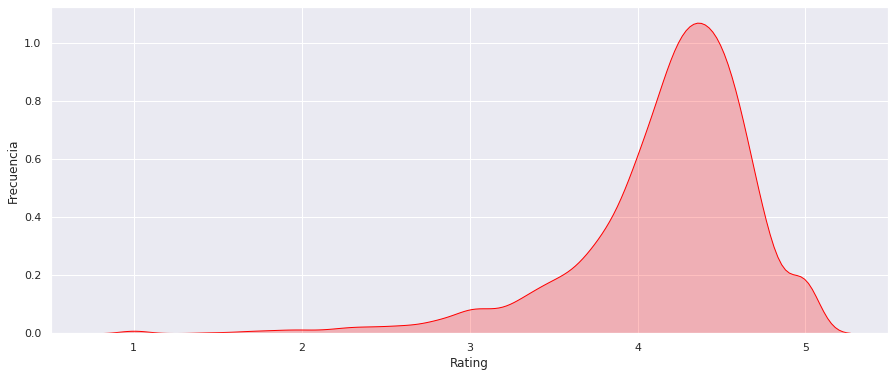

In [178]:
#Representación gráfica de los datos obtenidos con .describe()
plt.figure(figsize=(15,6))
g = sns.kdeplot(google["Rating"], color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frecuencia")
plt.show()

La media en las valoraciones de las aplicaciones es 4.17, con una desviación típica de 0.53. El percentil 75 de las aplicaciones obtienen una valoración superior a 4.5. Como hemos visto antes, no existe una correlación lineal entre las valoraciones de los clientes y el número de instalaciones. ¿Cuál es el número de instalaciones entre las 50 aplicaciones mejor valoradas?

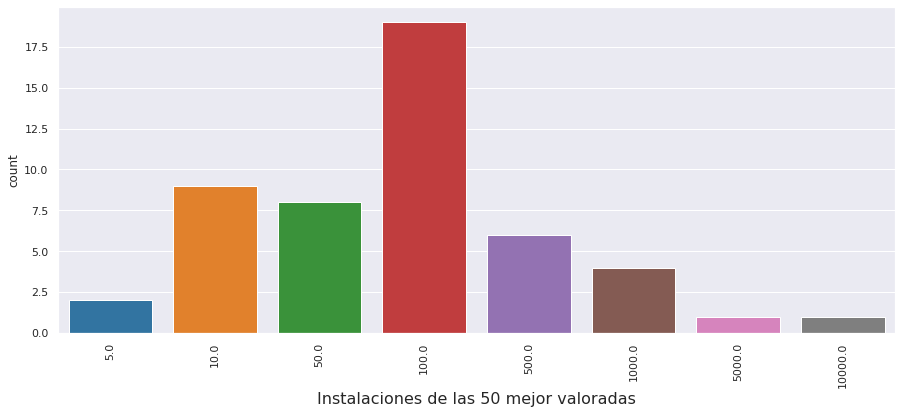

In [179]:
top_rate = google.sort_values(by = ["Rating"], ascending= False)
top_rate = top_rate.head(50)

sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(data = top_rate, x = "Installs")
plt.xticks(rotation=90)
plt.xlabel("Instalaciones de las 50 mejor valoradas", fontsize = 16)

plt.show()

Como vemos, entre las 50 aplicaciones mejor valoradas, el número de instalaciones es muy pequeño. No existe una relación entre las valoraciones mostradas en la plataforma con el "grado de éxito" de la aplicación en cuestión.

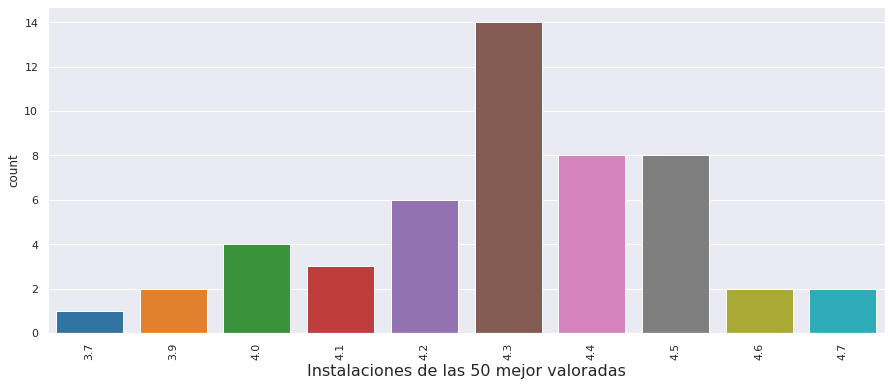

In [180]:
sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(data = top_installs, x = "Rating")
plt.xticks(rotation=90)
plt.xlabel("Instalaciones de las 50 mejor valoradas", fontsize = 16)

plt.show()

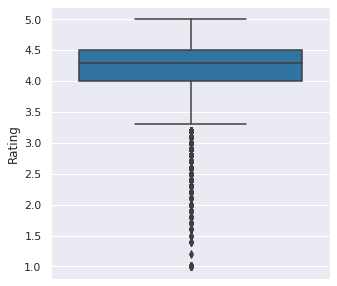

In [181]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating',data=google)

###Reviews (******)

"Reviews" está compuesta, también, por variables continuas. Lo que representa es el número de comentarios o valoraciones que tiene la aplicación. Está valoración suele ir acompañada de una puntuación que se recoge en "Rating".

In [182]:
google_reviews = google["Reviews"].dropna()

In [183]:
google_reviews.describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

La media de reviews en la plataforma es de 216.592, con una desviación de 1.831.320. El máximo es de 78.158.306 de valoraciones. El percentil 75 tiene más de 29.401.

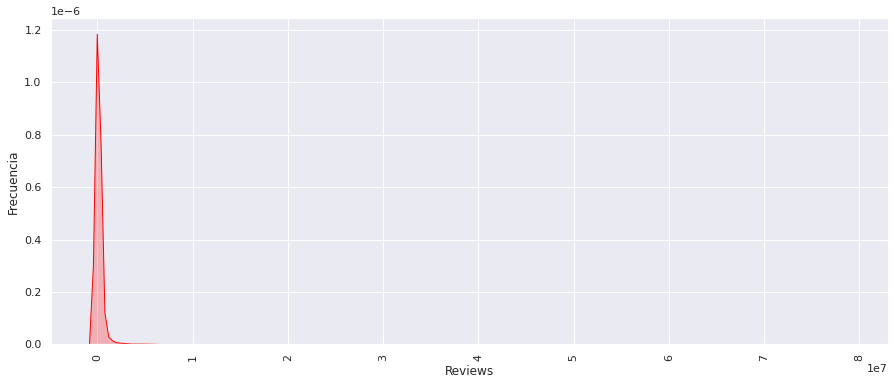

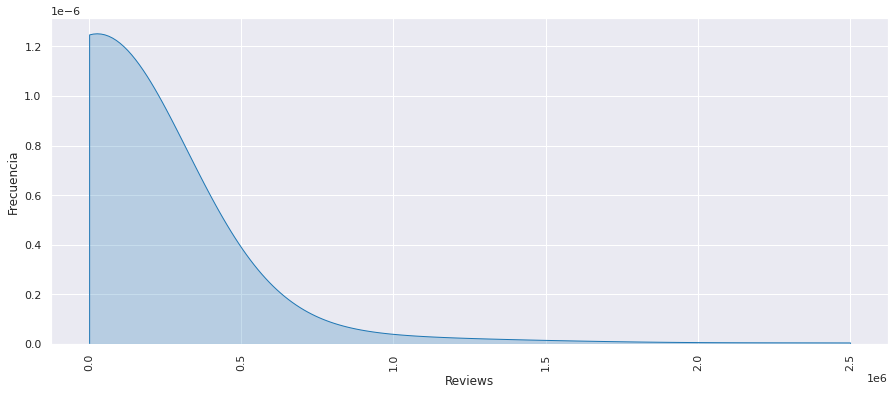

In [184]:
#Representación gráfica de los datos obtenidos con .describe()
plt.figure(figsize=(15,6))
g = sns.kdeplot(google.Reviews, color="Red", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frecuencia")
plt.xticks(rotation=90)


plt.figure(figsize=(15,6))
g = sns.kdeplot(google.Reviews, shade = True, clip = (0,2500000))
g.set_xlabel("Reviews")
g.set_ylabel("Frecuencia")
plt.xticks(rotation=90)

plt.show()

###Size

Size: representa el tamaño en Mb de la aplicación. Existen un total de 1227 valores nulos. Para el primer análisis, voy a obviar estos registros.

mode:  14.0


count    7021.000000
mean       21.767533
std        22.731296
min         0.008500
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size, dtype: float64

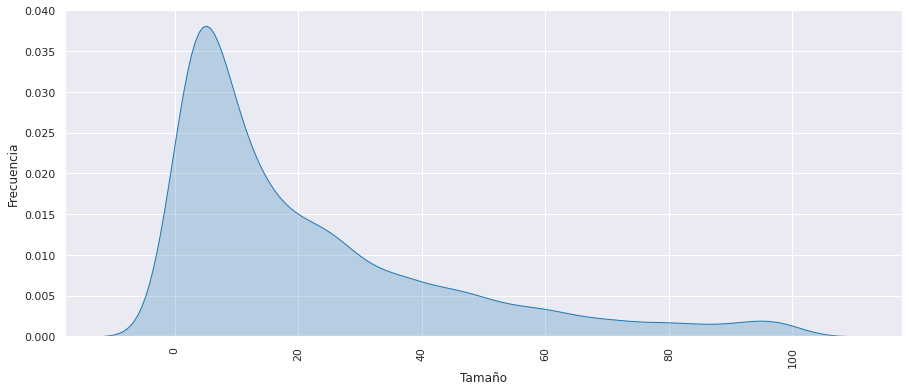

In [185]:
google_size = google.dropna()

plt.figure(figsize=(15,6))
g = sns.kdeplot(google_size.Size, shade = True)
g.set_xlabel("Tamaño")
g.set_ylabel("Frecuencia")
plt.xticks(rotation=90)

moda = google_size["Size"].mode()
print("mode: ", moda[0])
google_size["Size"].describe()


La mayoría de las aplicaciones tienen un tamaño relativamente pequeño, situandose las inferiores al tercer cuartil por debajo de 31 Mb. El tamaño que más se repite es el de 14 Mb.

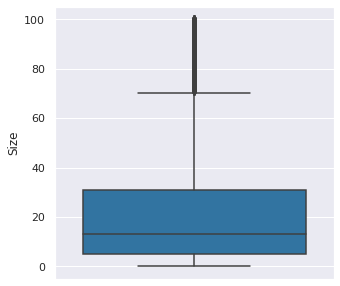

In [186]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Size',data=google_size)

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 10 Text major ticklabel objects>)

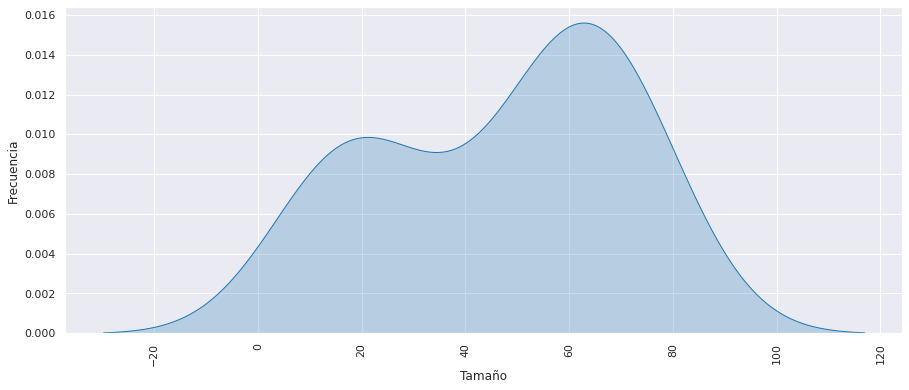

In [187]:
top_installs_size = google_size.sort_values(by = ["Installs"], ascending= False)
top_installs_size = top_installs.head(50)

plt.figure(figsize=(15,6))
g = sns.kdeplot(top_installs.Size, shade = True)
g.set_xlabel("Tamaño")
g.set_ylabel("Frecuencia")
plt.xticks(rotation=90)

Entre el top 50 de aplicaciones, la media de tamaño supera a la media general.

### Installs

Installs: es una variable discreta categorizada. Representa las instalaciones de una aplicación dentro de un conjunto.  

In [188]:
print("mode: ", google["Installs"].mode())
google["Installs"].describe()

mode:  0    1000000.0
dtype: float64


count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Text(0, 0.5, 'Número de Apps')

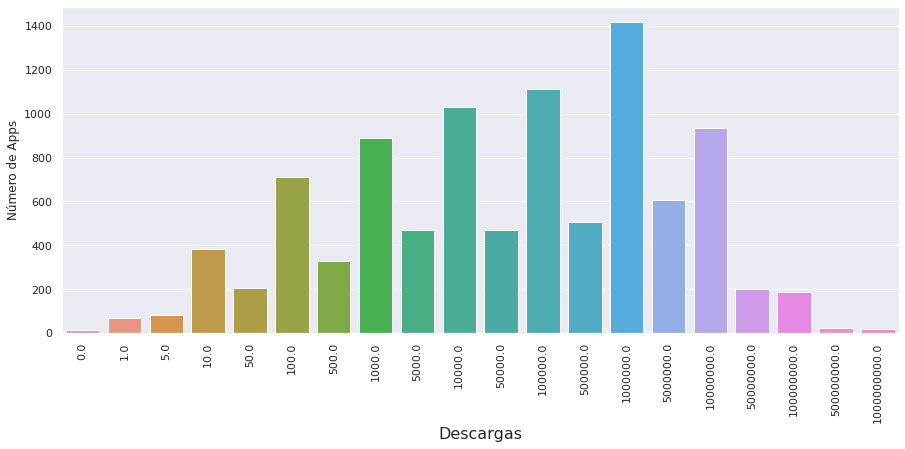

In [189]:
sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Installs", data = google)
plt.xticks(rotation=90)
plt.xlabel("Descargas", fontsize = 16)
plt.ylabel("Número de Apps")

1.000000e+06    1417
1.000000e+07     937
5.000000e+06     607
5.000000e+07     202
1.000000e+08     188
5.000000e+08      24
1.000000e+09      20
Name: Installs, dtype: int64

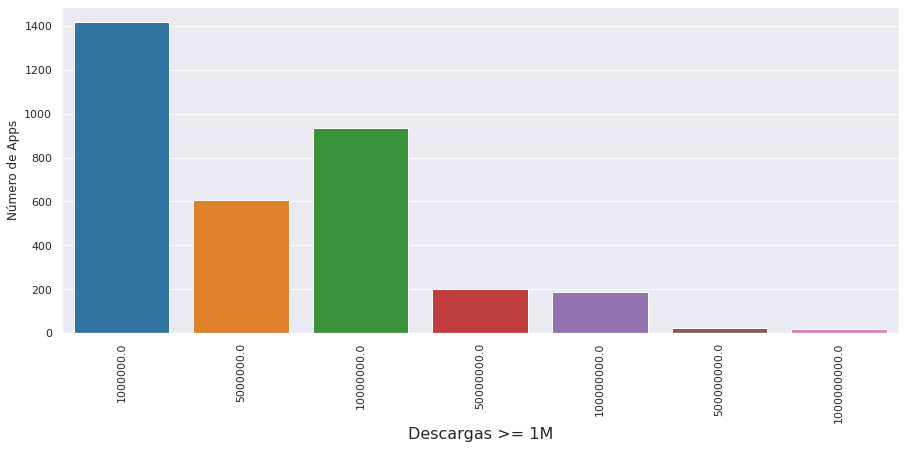

In [190]:
M_installs = google["Installs"] >= 1000000
M_installs = google[M_installs]

sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Installs", data = M_installs)
plt.xticks(rotation=90)
plt.xlabel("Descargas >= 1M", fontsize = 16)
plt.ylabel("Número de Apps")

M_installs["Installs"].value_counts()

El 35% de las aplicaciones de la Play Store tiene más de un millón de descargas,siendo la moda el 1.000.000 de descargas. El 65%, por lo tanto, tiene menos de 1 millón de descargas. Podemos observar claramente una distribución asimétrica positiva: hay pocas aplicaciones com pocas descargas y crece exponencialmente hasta el millón.

### Type

Type / Type (categorical): es una variable binaria, representa si la aplicación es gratis o de pago.
Existe un valor "outlier".

In [191]:
nulo = google.loc[:,"Type"] == -1.
nulo = google.loc[nulo]
nulo

App  ...  Reviews_present_count
8028  Command & Conquer: Rivals  ...                      0

[1 rows x 23 columns]

El valor es el representado por el "type" -1 que corresponde con la aplicación "Command & Conquer: Rivals". Tras investigar en la Google Play Store, el precio es 0.0, como se puede observar en la columna "Price".

In [192]:
google.iloc[8028,6] = 0.0
google['Type (categorical)'].fillna("Free", inplace = True)
google.loc[8028]

App                                        Command & Conquer: Rivals
Category                                                          11
Rating                                                           NaN
Reviews                                                            0
Size                                                             NaN
Installs                                                           0
Type                                                               0
Price                                                              0
Content Rating                                          Everyone 10+
Genres                                                           103
Last Updated                                              2018-06-28
Current Ver                                                     2750
Android Ver                                                       32
Last Updated (Year)                                             2018
Last Updated (Year/Month)         

Comprobamos que no existe nignún valor que difiera en esta variable:

In [193]:
type_app = google["Type"]
u_type = type_app.unique()
print(u_type)

[0. 1.]


In [194]:
type_app_cat = google["Type (categorical)"]
u_type_app_cat = type_app_cat.unique()
print(u_type_app_cat)

['Free' 'Paid']


In [195]:
df = pd.DataFrame({
    "ItemGroup": u_type,
    "ItemModule": u_type_app_cat})
dic_pago = df.groupby("ItemGroup")["ItemModule"].apply(list).to_dict()
dic_pago

{0.0: ['Free'], 1.0: ['Paid']}

Una vez analizada y corregida "Type", vamos a explorar la variable: 

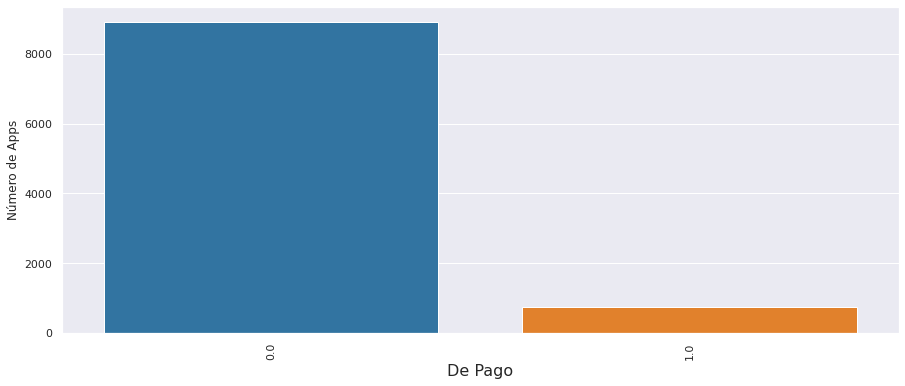

In [196]:
sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Type", data = google, order=google.Type.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("De Pago", fontsize = 16)
plt.ylabel("Número de Apps")

plt.show()

In [197]:
top_installs = google.sort_values(by = ["Installs"], ascending= False)
top_installs = top_installs.head(1000)

top_installs["Type"].value_counts()

0.0    999
1.0      1
Name: Type, dtype: int64

Hay un total de 8903 aplicaciones gratis frente a 756 de pago. Un ~90% de las aplicaciones de la Play Store son gratuitas. 
Si analizamos el top 100 de aplicaciones más descargadas, las 100 son gratis. Nos tenemos que ir al top 1000 de aplicaciones más descargadas para encontrar la primera aplicación de pago. A pesar de que no existe una correlación entre "Type" y el éxito de una aplicación, podemos intuir que el usuario tiende a descargar aplicaciones gratuitas frente a las de pago. 


### Price

Price: es una variable continua que que representa el precio de la aplicación en el mercado de apps.

In [198]:
google.Price.describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

La media de precios se encuentra en 1.09. Sin embargo, es arrastrada por valores outliers. Vamos a analizar esos valores, por ejemplo, las aplicaciones con precio superior a 200.

In [199]:
outliers = google.Price > 200
outliers = google[outliers]
outliers

App  ...  Reviews_present_count
3327             most expensive app (H)  ...                      0
3465                         💎 I'm rich  ...                      0
3469           I'm Rich - Trump Edition  ...                      0
4396                          I am rich  ...                      0
4398                     I am Rich Plus  ...                      0
4399                      I am rich VIP  ...                      0
4400                  I Am Rich Premium  ...                      0
4401                I am extremely Rich  ...                      0
4402                         I am Rich!  ...                      0
4403                 I am rich(premium)  ...                      0
4406                      I Am Rich Pro  ...                      0
4408     I am rich (Most expensive app)  ...                      0
4410                          I Am Rich  ...                      0
4413                          I am Rich  ...                      0
4417                 I AM RICH PRO PLUS  ...                      0
8763                        Eu Sou Rico  ...                      0
8780  I'm Rich/Eu sou Rico/أنا غني/我很有錢  ...                      0

[17 rows x 23 columns]

Todas las aplicaciones con precio superior a 200, son una aplicación llamada "I am Rich" y todas sus variantes. Esta aplicación no interesa para el estudio de las variables que afectan al éxito de una app. 

In [200]:
google = pd.concat([google, outliers, outliers]).drop_duplicates(keep=False)

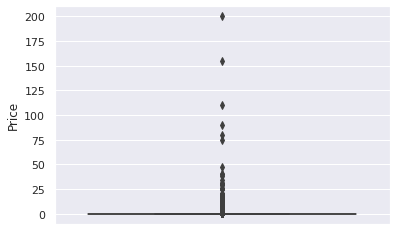

In [201]:
sns.boxplot(data=google, y ="Price")

count    9642.000000
mean        0.410007
std         3.678782
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       200.000000
Name: Price, dtype: float64

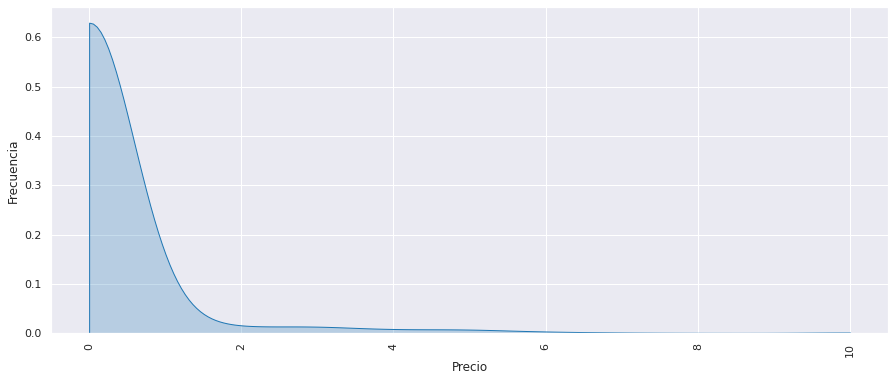

In [202]:
plt.figure(figsize=(15,6))
g = sns.kdeplot(google["Price"], shade = True, clip=(0,10))
g.set_xlabel("Precio")
g.set_ylabel("Frecuencia")
plt.xticks(rotation=90)

google.Price.describe()

Text(0.5, 0, 'Apps precio < 5')

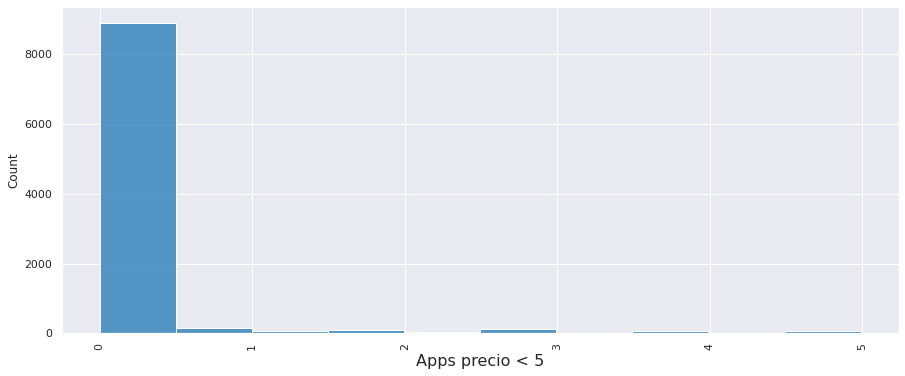

In [203]:
precios = google["Price"] < 5
precios = google[precios]

sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.histplot(data = precios, x = "Price", bins = 10 )
plt.xticks(rotation=90)
plt.xlabel("Apps precio < 5", fontsize = 16)

A pesar de que existen algunas aplicaciones que no son gratis (756, de acuerdo al análisis de la variable "Type"), la mayoría si que lo son. 

### Content Rating

Content Rating: es una variable categórica que representa la calificación de una aplicación. La calificación ayuda a determinar a partir de que edad se considera responsable el uso de dicha aplicación.

In [204]:
google["Content Rating"].value_counts()

Everyone           7887
Teen               1035
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [205]:
unrated = google.loc[:,"Content Rating"] == "Unrated"
unrated = google.loc[unrated]
unrated

App  Category  ...  No_reviews_count  Reviews_present_count
6267     Best CG Photography      11.0  ...                 0                      0
7189  DC Universe Online Map      29.0  ...                 0                      0

[2 rows x 23 columns]

Tras investigar en Google PLay Store, los valores "Unrated" corresponden a las aplicaciones: 
- Best CG Photography, para todos los públicos.
- DC Universe Online Map, para mayores de 10.	

In [206]:
#Sustituimos por los valores que corresponden mediante el método .loc:
google.loc[6267, "Content Rating"] = "Everyone"
google.loc[7189, "Content Rating"] = "Everyone 10+"

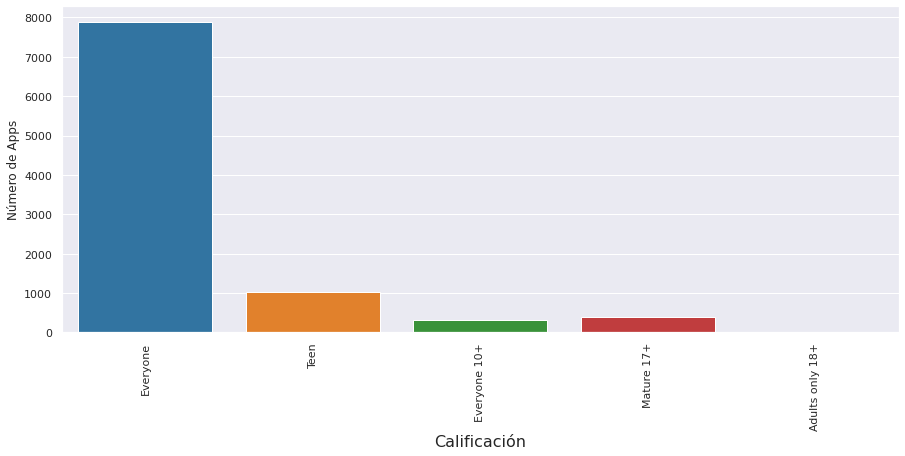

Everyone           7888
Teen               1035
Mature 17+          393
Everyone 10+        323
Adults only 18+       3
Name: Content Rating, dtype: int64

In [207]:
sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Content Rating", data = google)
plt.xticks(rotation=90)
plt.xlabel("Calificación", fontsize = 16)
plt.ylabel("Número de Apps")
plt.show()

google["Content Rating"].value_counts()

7888 aplicaciones han sido calificadas para todos los públicos. Esto supone un 81% de las aplicaciones. La calificación "Teen", es decir, para mayores de 13, es la siguiente más frecuente, con 1035 apps. Entre las dos suman el 91% de las aplicaciones. 

¿Entre las aplicaciones más descargadas, como será la distribución?

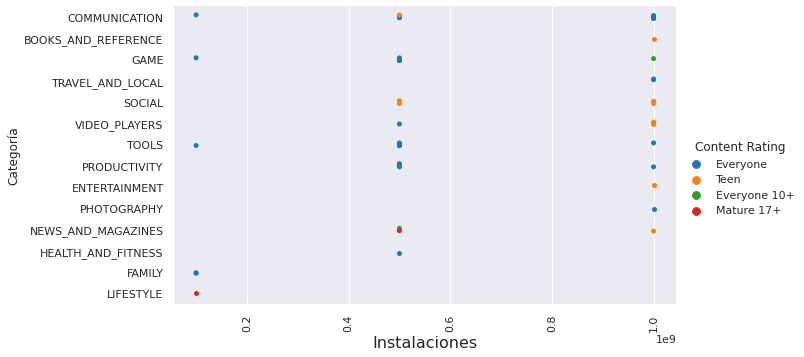

Everyone        35
Teen            11
Mature 17+       2
Everyone 10+     2
Name: Content Rating, dtype: int64

In [208]:
top50_installs = top_installs.head(50)

sns.set_style('darkgrid')
sns.set_context("notebook")
sns.catplot(x = "Installs", y ="Category (categorical)", hue = "Content Rating", data = top50_installs, height= 5, aspect = 2)
plt.xticks(rotation=90)
plt.xlabel("Instalaciones", fontsize = 16)
plt.ylabel("Categoría")
plt.show()

top50_installs["Content Rating"].value_counts()

Entre el top 50 aplicaciones, el 70% de las aplicaciones son para todos los públicos, frente al 22% para mayores de 13 años, 4% para mayores de 10 y 4% para mayores de 18.

###Genres

Genres - Genres (categorical): representan la misma categoría. Está formada por 118 géneros, muchos de ellos relacionados con un tema en común. El órden va desde 0.0 a 117.0, siguiendo un órden alfabético.

In [209]:
genres = google["Genres"]
u_genres = genres.unique()
u_genres

array([  9.,  12.,  11.,  10.,  13.,  14.,  19.,  22.,  33.,  34.,  35.,
        37.,  42.,  38.,  41.,  43.,  39.,  44.,  40.,  51.,  56.,  53.,
        54.,  58.,  59.,  60.,  61.,  64.,  65.,  66.,  68.,   3.,   6.,
        26.,  23.,  32.,   0., 103.,  82., 101.,  71., 117.,  87.,  29.,
        27.,  96.,   2.,  15., 111.,  90.,  98.,   1.,  28.,  97.,  48.,
        84.,  49.,  47.,  50.,  55.,  30.,  73.,  88.,   8.,  91.,  99.,
        85., 102.,  46.,   7.,  52.,  83., 104.,  72.,  63.,   5.,  17.,
        16.,  18.,  31.,  94.,  57., 114.,  24.,  70., 100.,  95.,  80.,
       109., 110., 107., 108.,  79.,  81.,  75.,  78.,  77.,  76., 116.,
       113., 115.,  74.,  69.,  62.,  45.,  25.,   4., 112.,  67.,  20.,
        21.,  86.,  93.,  92., 106.,  89.,  36., 105.])

In [210]:
genres_cat = google["Genres (categorical)"]
u_genres_cat = genres_cat.unique()
u_genres_cat

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [211]:
lista_prueba =[]
for val in genres_cat:
  if ";" not in val:
    lista_prueba.append(val)

lista_prueba = list(set(lista_prueba))
lista_prueba


['Books & Reference',
 'Puzzle',
 'Word',
 'Beauty',
 'Health & Fitness',
 'Board',
 'Personalization',
 'Trivia',
 'Medical',
 'Card',
 'Sports',
 'Lifestyle',
 'Racing',
 'Educational',
 'Education',
 'Libraries & Demo',
 'Parenting',
 'Music',
 'News & Magazines',
 'Travel & Local',
 'Tools',
 'Comics',
 'Art & Design',
 'Strategy',
 'Photography',
 'Weather',
 'Food & Drink',
 'Business',
 'Social',
 'Auto & Vehicles',
 'Maps & Navigation',
 'Arcade',
 'Productivity',
 'House & Home',
 'Casual',
 'Adventure',
 'Role Playing',
 'Events',
 'Finance',
 'Simulation',
 'Shopping',
 'Casino',
 'Dating',
 'Action',
 'Video Players & Editors',
 'Entertainment',
 'Communication']

In [212]:
df = pd.DataFrame({
    "ItemGroup": u_genres,
    "ItemModule": u_genres_cat})
dic_genres = df.groupby("ItemGroup")["ItemModule"].apply(list).to_dict()
dic_genres

{0.0: ['Action'],
 1.0: ['Action;Action & Adventure'],
 2.0: ['Adventure'],
 3.0: ['Adventure;Action & Adventure'],
 4.0: ['Adventure;Brain Games'],
 5.0: ['Adventure;Education'],
 6.0: ['Arcade'],
 7.0: ['Arcade;Action & Adventure'],
 8.0: ['Arcade;Pretend Play'],
 9.0: ['Art & Design'],
 10.0: ['Art & Design;Action & Adventure'],
 11.0: ['Art & Design;Creativity'],
 12.0: ['Art & Design;Pretend Play'],
 13.0: ['Auto & Vehicles'],
 14.0: ['Beauty'],
 15.0: ['Board'],
 16.0: ['Board;Action & Adventure'],
 17.0: ['Board;Brain Games'],
 18.0: ['Board;Pretend Play'],
 19.0: ['Books & Reference'],
 20.0: ['Books & Reference;Creativity'],
 21.0: ['Books & Reference;Education'],
 22.0: ['Business'],
 23.0: ['Card'],
 24.0: ['Card;Action & Adventure'],
 25.0: ['Casino'],
 26.0: ['Casual'],
 27.0: ['Casual;Action & Adventure'],
 28.0: ['Casual;Brain Games'],
 29.0: ['Casual;Creativity'],
 30.0: ['Casual;Education'],
 31.0: ['Casual;Music & Video'],
 32.0: ['Casual;Pretend Play'],
 33.0: ['Comi

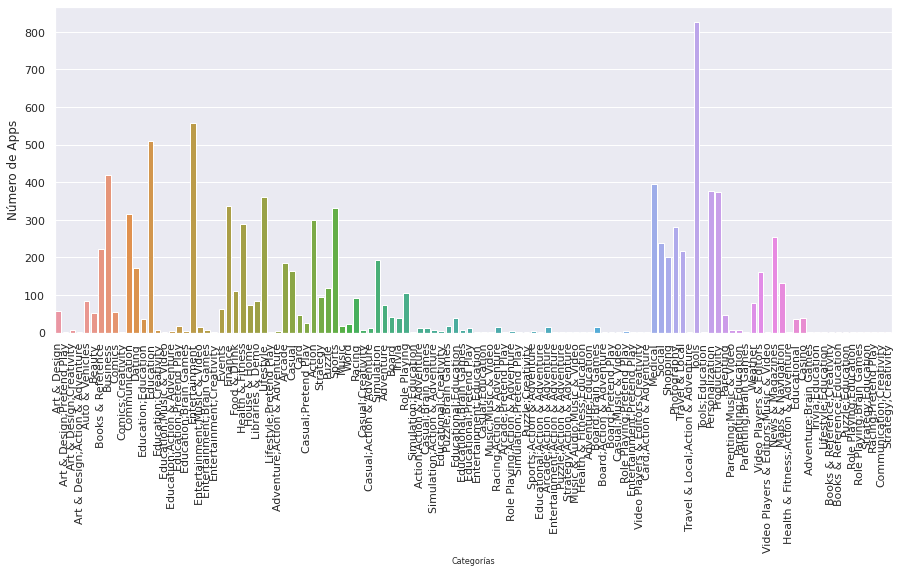

In [213]:
sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.countplot(x="Genres (categorical)", data = google)
plt.xticks(rotation=90)
plt.xlabel("Categorías", fontsize = 8)
plt.ylabel("Número de Apps")

plt.show()

### Updated

Last Updated (Year/Month) - Last Updated (Year/Month) (categorical): indica la fecha de última actualización de la aplicación. Hay 88 fechas distintas. La fecha más antigua de actualización es mayo de 2010, mientras que la más moderna es agosto de 2018. La fecha que más se repite es julio de 2018.

In [214]:
updated = google["Last Updated (Year/Month)"]
u_updated = updated.unique()
len(u_updated)

88

In [215]:
updated_cat = google["Last Updated (Year/Month) (categorical)"]
u_updated_cat = updated_cat.unique()
u_updated_cat

array(['2018-01', '2018-08', '2018-06', '2017-03', '2018-04', '2017-09',
       '2018-07', '2017-10', '2017-11', '2018-03', '2017-08', '2018-05',
       '2017-12', '2014-08', '2016-10', '2018-02', '2017-07', '2015-07',
       '2014-10', '2016-08', '2015-08', '2016-04', '2015-09', '2017-05',
       '2017-04', '2016-11', '2015-02', '2016-06', '2014-07', '2016-09',
       '2017-01', '2017-02', '2016-02', '2017-06', '2016-07', '2015-06',
       '2015-04', '2013-12', '2016-05', '2016-12', '2015-01', '2015-12',
       '2012-06', '2016-03', '2015-03', '2015-05', '2015-10', '2013-03',
       '2012-01', '2011-06', '2013-02', '2014-04', '2014-11', '2013-05',
       '2014-12', '2016-01', '2012-11', '2013-11', '2014-09', '2013-07',
       '2013-10', '2014-05', '2014-06', '2013-09', '2015-11', '2014-01',
       '2013-04', '2013-08', '2011-12', '2014-02', '2012-09', '2012-10',
       '2013-01', '2011-05', '2013-06', '2014-03', '2011-09', '2012-04',
       '2012-07', '2012-02', '2012-08', '2011-07', 

In [216]:
df = pd.DataFrame({
    "ItemGroup": u_updated,
    "ItemModule": u_updated_cat})
dic_updated = df.groupby("ItemGroup")["ItemModule"].apply(list).to_dict()
dic_updated

{0.0: ['2010-05'],
 1.0: ['2011-01'],
 2.0: ['2011-03'],
 3.0: ['2011-04'],
 4.0: ['2011-05'],
 5.0: ['2011-06'],
 6.0: ['2011-07'],
 7.0: ['2011-09'],
 8.0: ['2011-10'],
 9.0: ['2011-12'],
 10.0: ['2012-01'],
 11.0: ['2012-02'],
 12.0: ['2012-04'],
 13.0: ['2012-06'],
 14.0: ['2012-07'],
 15.0: ['2012-08'],
 16.0: ['2012-09'],
 17.0: ['2012-10'],
 18.0: ['2012-11'],
 19.0: ['2012-12'],
 20.0: ['2013-01'],
 21.0: ['2013-02'],
 22.0: ['2013-03'],
 23.0: ['2013-04'],
 24.0: ['2013-05'],
 25.0: ['2013-06'],
 26.0: ['2013-07'],
 27.0: ['2013-08'],
 28.0: ['2013-09'],
 29.0: ['2013-10'],
 30.0: ['2013-11'],
 31.0: ['2013-12'],
 32.0: ['2014-01'],
 33.0: ['2014-02'],
 34.0: ['2014-03'],
 35.0: ['2014-04'],
 36.0: ['2014-05'],
 37.0: ['2014-06'],
 38.0: ['2014-07'],
 39.0: ['2014-08'],
 40.0: ['2014-09'],
 41.0: ['2014-10'],
 42.0: ['2014-11'],
 43.0: ['2014-12'],
 44.0: ['2015-01'],
 45.0: ['2015-02'],
 46.0: ['2015-03'],
 47.0: ['2015-04'],
 48.0: ['2015-05'],
 49.0: ['2015-06'],
 50.0: ['2

La variable "Last Updated (Year/Month)" representa un valor ordinal, siendo 0.0 la fecha más antigua y 87.0 la más moderna. 

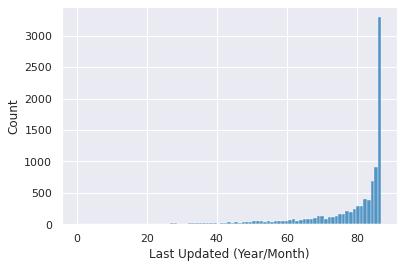

In [217]:
sns.histplot(x="Last Updated (Year/Month)", data = google, legend = True)

La mayoría de las apliaciones han sido actualizadas a la fecha de extracción de este dataset. 

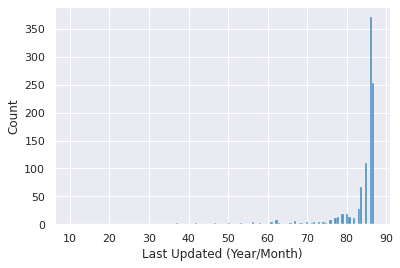

In [218]:
sns.histplot(x = "Last Updated (Year/Month)", data = top_installs)

Respecto al top 50 de aplicaciones más descargadas, se mantiene la tendencia. La inmensa mayoría de ellas están actualizadas a día de la fecha, siendo la aplicación con la actualización más antigua el 11-2017. Por lo que podemos intuir, las aplicaciones más descargdas están en continua mejora.

### Current Ver / Android Ver

Las variables Current Ver y Android Ver representan la versión actual de la aplicación y la versión de Android sobre la que corre la app. Son variables continuas, con sus homólogas categóricas como vimos en casos anteriores.

In [219]:
current_ver = google["Current Ver"]
cat_current_ver = google["Current Ver (categorical)"]

df = pd.DataFrame({
    "ItemGroup": current_ver,
    "ItemModule": cat_current_ver})
dic_version = df.groupby("ItemGroup")["ItemModule"].apply(list).to_dict()

In [220]:
google["Current Ver"].value_counts()

2750.0    1055
113.0      794
277.0      260
424.0      176
1014.0     148
          ... 
1480.0       1
134.0        1
936.0        1
79.0         1
2567.0       1
Name: Current Ver, Length: 2817, dtype: int64

Existen un total de 2817 valores únicos, siendo el que más se repite el 2750.0.

In [221]:
google["Android Ver"].value_counts()

 17.0    2198
 15.0    1392
 13.0    1283
 32.0     990
 20.0     815
 8.0      616
 25.0     512
 18.0     370
 9.0      273
 7.0      239
 10.0     231
 19.0     220
 5.0      133
 2.0      115
 27.0      54
 29.0      41
 12.0      36
 3.0       32
 26.0      22
 1.0       20
 21.0      11
 11.0      10
 4.0        7
 31.0       6
 30.0       3
 14.0       2
 24.0       2
-1.0        2
 0.0        2
 28.0       1
 6.0        1
 23.0       1
 22.0       1
 16.0       1
Name: Android Ver, dtype: int64

Existen 34 valores únicos para la versión de Android.

En la matriz de correlación observamos que existe una fuerte relación lineal entre ambas variables (0.48). En el anáisis bivariante analizaré unicamente la variable "Current Ver".

##Análisis bivariante

###Installs - Category

Vamos a analizar la variable Category y su relación con otras variables:

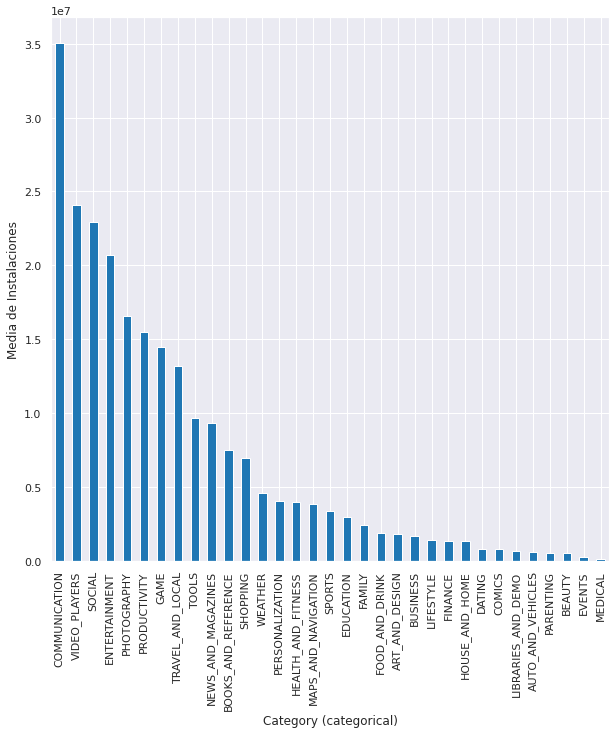

In [222]:
google.groupby('Category (categorical)').Installs.mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
plt.ylabel("Media de Instalaciones")
plt.show()

En el acumulado, la categoría con mayor media de descargas es "Communication", seguida de "Video Players" y "Social".

Las categorías con más aplicaciones no son las más descargadas. El ejemplo claro es la categoría "Family", que pasa de ser la categoría con más apps a la 19 más descargada.

La posición de "Communication" y "Social" cuadra con lo visto en el análisis de las 50 aplicaciones más descargadas. 

###Installs - Reviews

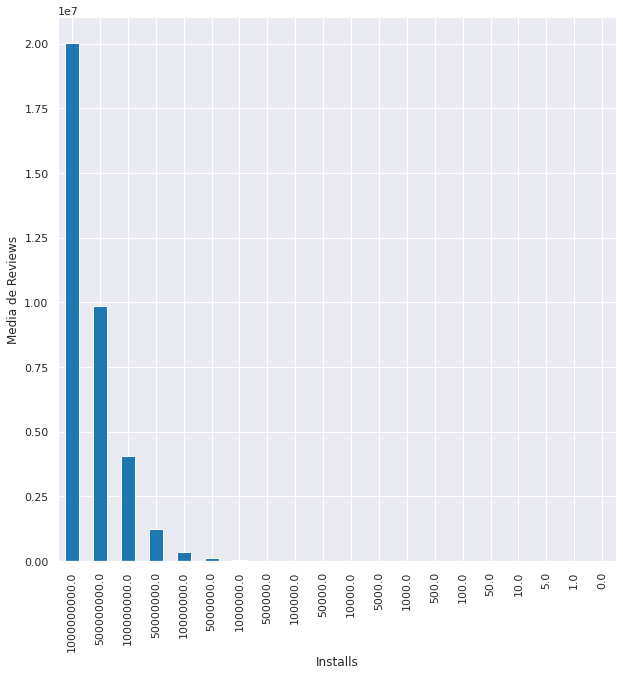

In [223]:
google.groupby("Installs").Reviews.mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
plt.ylabel('Media de Reviews')
plt.show()

En los gráficos de barras anteriores podemos ver la misma tendencia. Las aplicaciones de pago tienen a tener mejor valoraciones que las gratuitas. 
El bajo precio medio de las aplicaciones entre 3.5 y 4.5 se debe al incremento de número de apps gartuitas en dicho sector, que hace que rebaje el precio medio.

### Installs - Rating

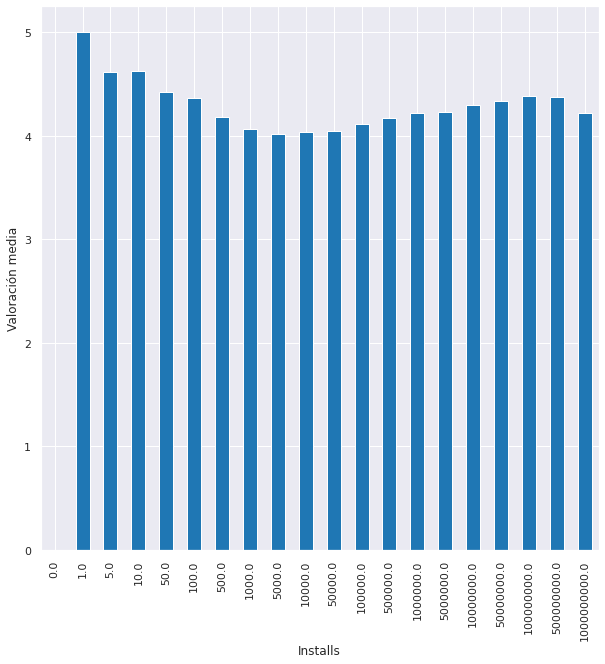

In [224]:
google.sort_values(["Installs"], ascending=False).groupby("Installs").Rating.mean().plot(kind='bar',figsize=(10,10))
plt.ylabel('Valoración media')
plt.show()

Podemos observar dos patrones:
- El primero de ellos se da en las aplicaciones con pocas descargas. Estas podemos considerarlas aplicaciones nicho, tienen pocos usuarios pero aquellos que se la han descargado le dan una valoración por encima de la media.
- El segundo de ellos, se encuentra a partir de las 1000 descargas. Ahí observamos una tendencia al alza de las medias de valoración. Considero que a partir de las 1000 descargas podemos considerar que una app pasa al mercado mayoritario, obteniendo peor valoración de los usuarios medios.

###Installs - Size

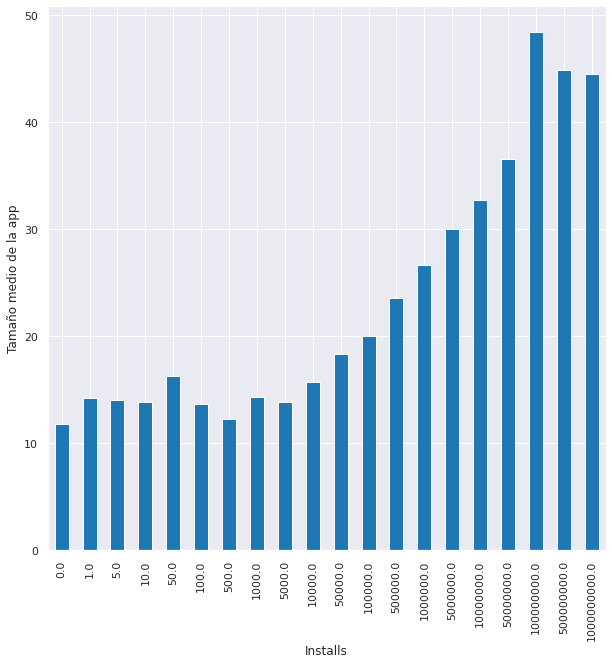

In [225]:
google.sort_values(["Installs"], ascending=False).groupby("Installs").Size.mean().plot(kind='bar',figsize=(10,10))
plt.ylabel('Tamaño medio de la app')
plt.show()

Como vimos en el análisi univariante para el top50 de apliciones más instaladas, las que tienen mayor número de descargas tienen un tamaño medio superior a las menos descargadas, que son más ligeras. Por ello, podemos inferir que las aplicaciones más pesadas son más atractivas para los usuarios, no por el tamaño en si, sino por la complejidad y las opciones de las mismas.

### Installs - Price/Type

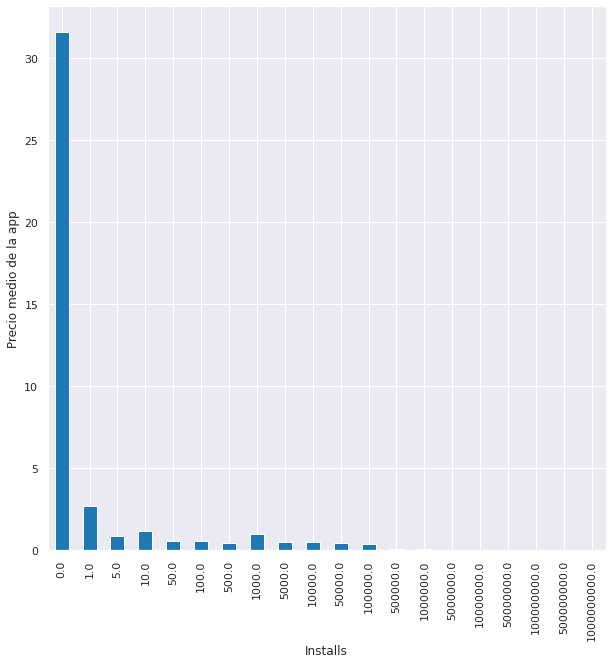

In [226]:
google.sort_values(["Installs"], ascending=False).groupby("Installs").Price.mean().plot(kind='bar',figsize=(10,10))
plt.ylabel('Precio medio de la app')
plt.show()

El gráfico de barras muestra que las aplicaciones más descargadas tienen un precio medio menor que las menos descargadas. Es curioso la relación de este gráfico con la de "Rating"-"Price", que veremos más adelante: la gente se descarga más las aplicaciones gratuitas pero sin embargo las valora menos que las de pago. 

###Installs - Content Rating

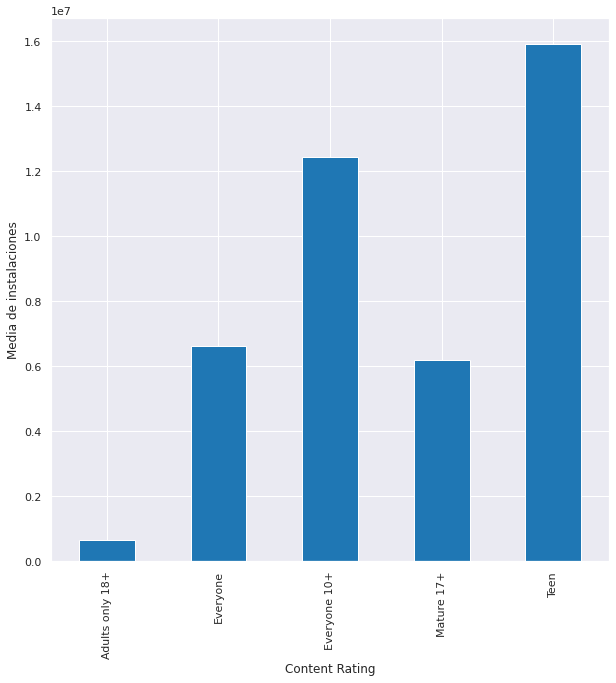

In [227]:
google.sort_values(["Content Rating"], ascending=False).groupby("Content Rating").Installs.mean().plot(kind='bar',figsize=(10,10))
plt.ylabel('Media de instalaciones')
plt.show()

Mientras que en el análisis de la variable "Content Rating", cuando la analizamos en relación al top 50 de aplicaciones más instaladas, vimos que el 70 % de las aplicaciones eran para Todos los Públicos, en este gráfico observamos que la mayor media de instalaciones la obtiene la categoría para mayores de 13 años.

### Installs - Updated

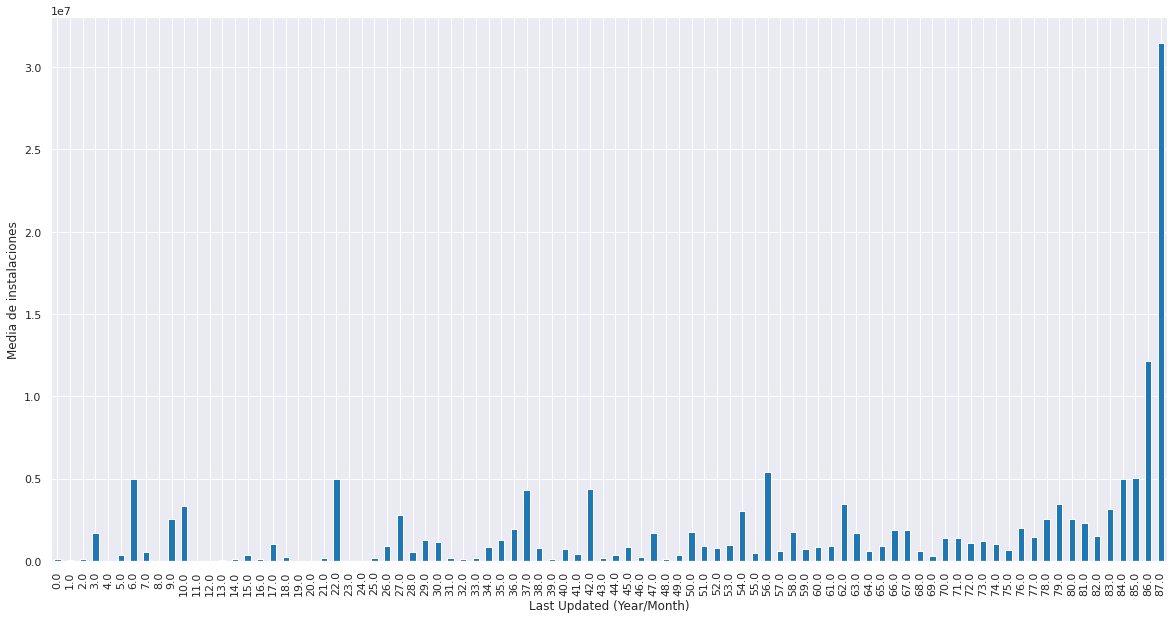

In [228]:
google.sort_values(["Last Updated (Year/Month)"], ascending=False).groupby("Last Updated (Year/Month)").Installs.mean().plot(kind='bar',figsize=(20,10))
plt.ylabel('Media de instalaciones')
plt.show()

Las aplicaciones más instaladas son aquellas que se mantienen actualizadas, ya sea por ofrecer caractéristicas nuevas u optimizadas, o porque tiene impacto en el buscador de la Play Store. La diferencia respecto a las actualizadas el mes anterior es de más de 15 millones de descargas.

Respecto al resto, existen ciertas variaciones respecto a la media de instalaciones pero se observa que la media aumenta conforme nos acercamos a la última fecha registrada. Esto parece indicar que solo se mantienen actualizadas las aplicaciones que son descargadas.

###Installs - Current Ver

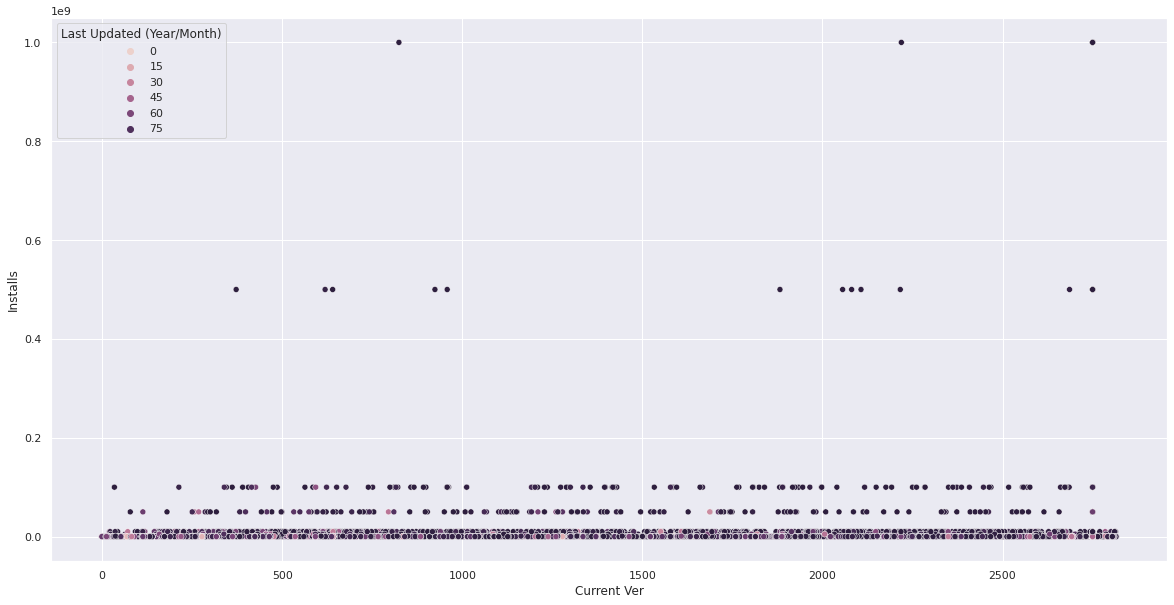

In [229]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Current Ver", y = "Installs", hue = "Last Updated (Year/Month)", data = google)
plt.show()

En este gráfico podemos ver que solo las aplicaciones más actualizadas son las que tienen mayores descargas. 

### Category - Type

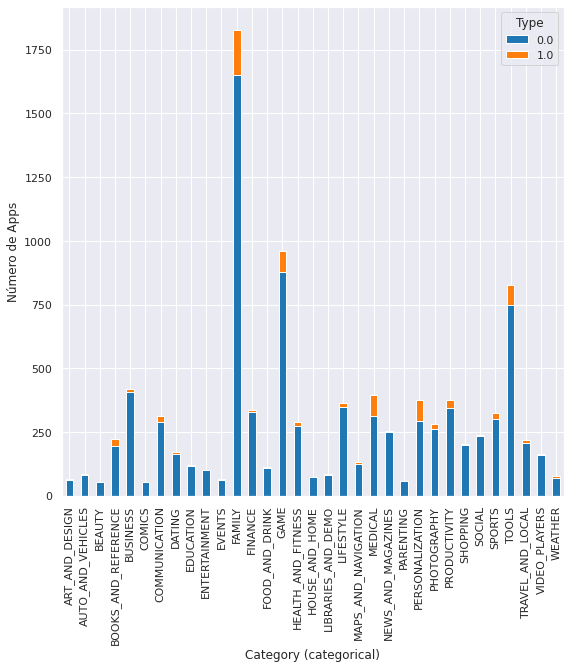

In [230]:
google.groupby(["Category (categorical)","Type"]).size().unstack().plot(kind='bar',stacked=True,figsize=(9,9))
plt.ylabel("Número de Apps")
plt.show()

En el gráfico podemos ver el impacto que tiene el tipo de aplicación (gratis o de pago) sobre las categorías. Las apps de pago están centradas en "Family", "Games", "Tool", "Medical" y "Personalization". Como analicé anteriormente, las tres categorías con más apps son "Family", "Games" y "Tool", por lo que es sensato intuir que existe un mayor mercado para dichas categorías.

En "Type" existe un valor -1. Esto será corregido durante el análisis de "Type"

###Category - Reviews

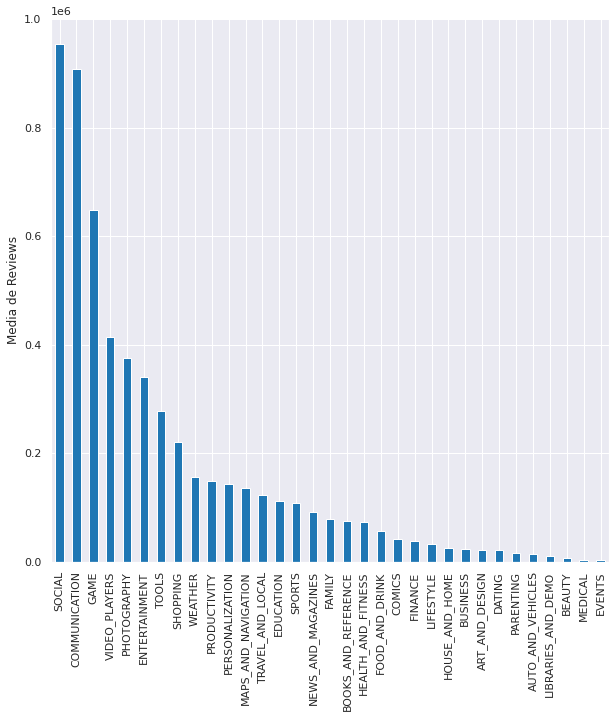

In [231]:
google.groupby('Category (categorical)').Reviews.mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
plt.xlabel("")
plt.ylabel('Media de Reviews')
plt.show()

En este caso, las categorías con mayores comentarios son "Social", "Communication" y "Game".

De acuerdo en lo visto en la matriz de correlación, existe una fuerte relación entre el número de descargas y los comentarios. Es evidente, que cuanto más se descarga una aplicación, cuantos más usuarios tenga, más comentarios habrá sobre ella.

###Category - Rating

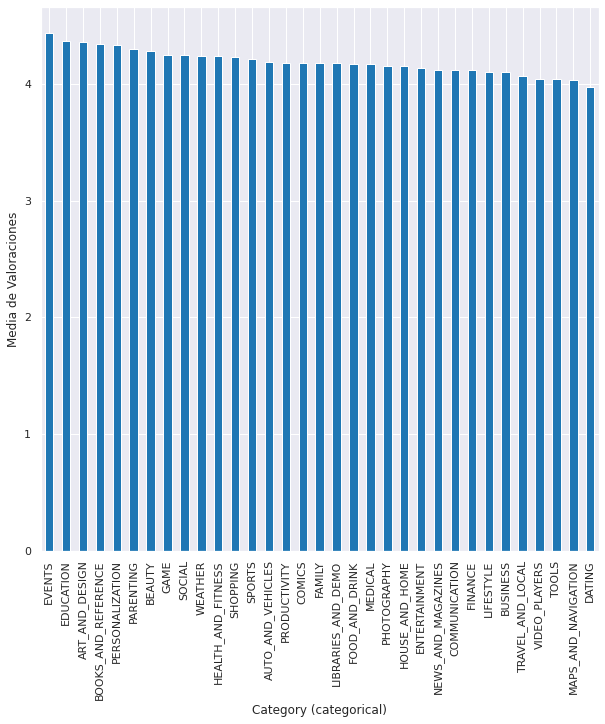

In [232]:
google.groupby('Category (categorical)').Rating.mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))
plt.ylabel('Media de Valoraciones')
plt.show()

Respecto a las valoraciones de los usuarios, no podemos sacar nada en claro. Como mostraré en el apartado siguiente, la media de valoraciones es 4.17. En el caso concreto de las categorías, la media es estable alrededor de la media general.

Las mejor valoradas son "Events", "Education" y "Art and Design". La peor valorada "Dating".

Para terminar, la variable "Category" nos muestra no solo la tématica de las aplicaciones, también que el consumidor busca socializar, ya sea a través de aplicaciones de mensajería o de redes sociales, y entretenerse, mediante juegos o servicios de video.

###Rating - Reviews

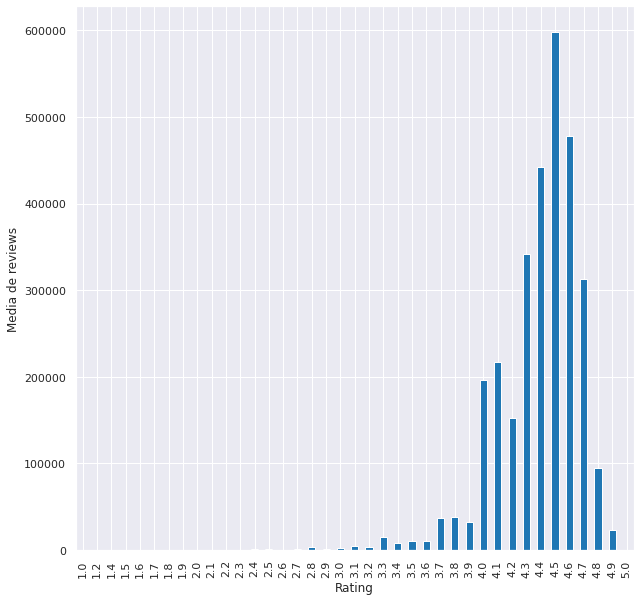

In [233]:
google.sort_values("Rating", ascending= False).groupby('Rating').Reviews.mean().plot(kind='bar',figsize=(10,10))
plt.ylabel('Media de reviews')
plt.show()

La gráfica muestra que el un mayor número de reviews mejora el rating de la aplicación. Con esto quiero decir, que el usuario comenta más cuanto mejor sea la apliación. De hecho, el número de reviews aumento significativamente tras superar a la media (en el intervalo de 4.2 a 4.7)

###Rating - Type

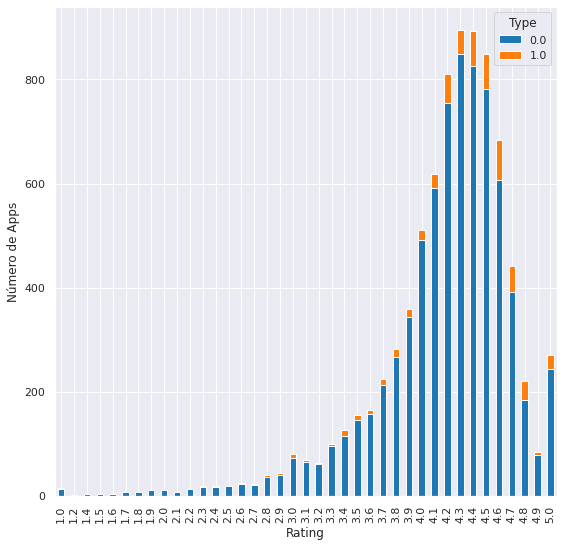

In [234]:
google.sort_values(["Rating"], ascending = False).groupby(["Rating","Type"]).size().unstack().plot(kind='bar',stacked=True,figsize=(9,9))
plt.ylabel("Número de Apps")
plt.show()

###Rating - Price

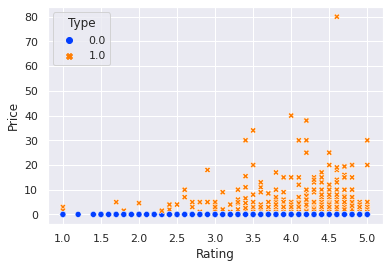

In [235]:
sns.scatterplot(x="Rating", y="Price", hue = "Type", style = "Type", palette= "bright", data = google)

Si comparamos el precio de las aplicaciones con la valoración, vemos que las aplicaciones de pago suelen estar mejor valoradas por los usuarios. Las gratuitas sin embargo, se reparten a lo largo del conjunto de valoraciones. Por lo que vemos, el cliente tiene cierto sesgo a valorar mejor algo por lo que ha pagado que por aquello que le ha salido gratis.

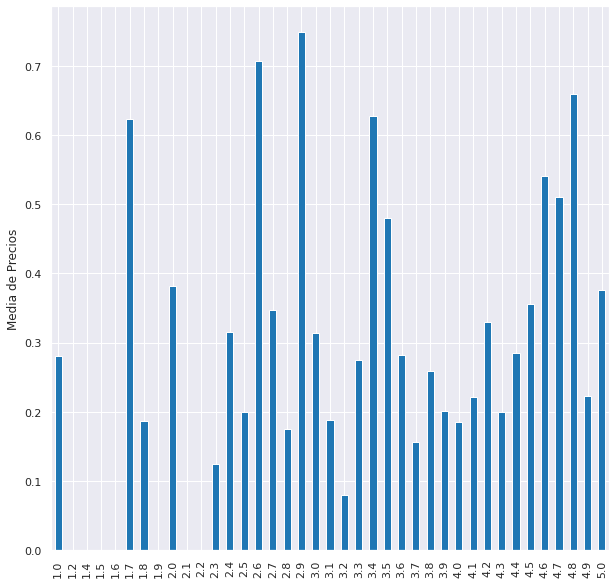

In [236]:
google.sort_values(["Rating"], ascending=False).groupby('Rating').Price.mean().plot(kind='bar',figsize=(10,10))
plt.xlabel("")
plt.ylabel('Media de Precios')
plt.show()

###Reviews - Price

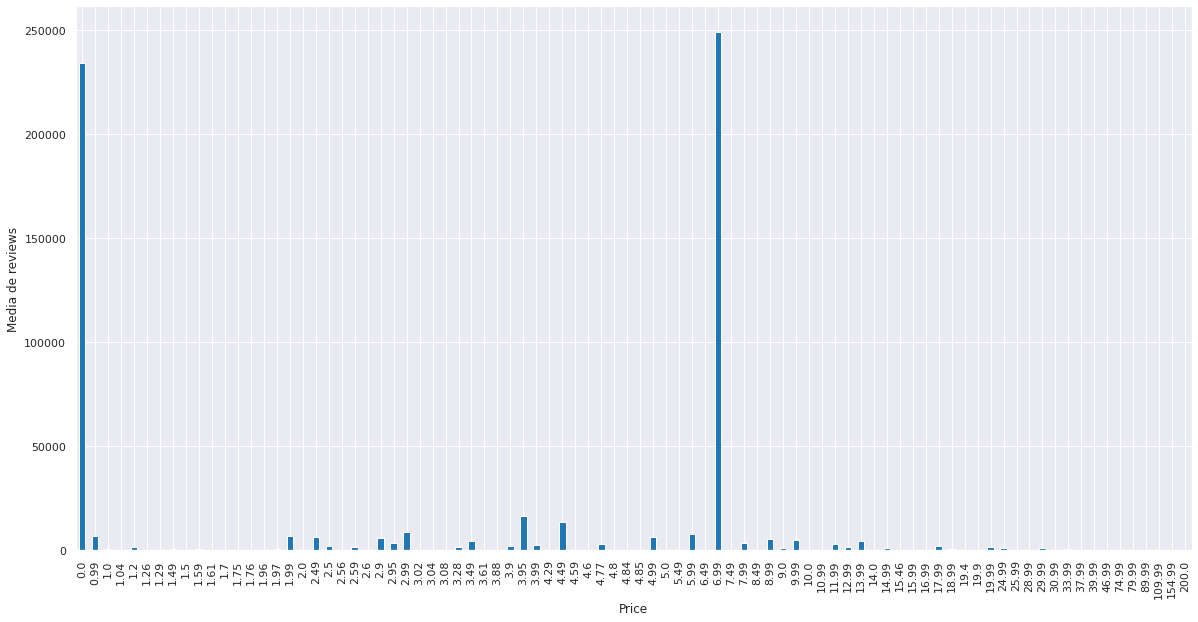

In [237]:
google.sort_values(["Price"], ascending= True).groupby('Price').Reviews.mean().plot(kind='bar',figsize=(20,10))
plt.ylabel('Media de reviews')
plt.show()

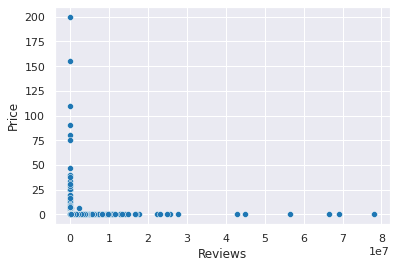

In [238]:
sns.scatterplot(x="Reviews", y="Price", palette= "bright", data = google)

Las aplicaciones con mayor número de reviews son las aplicaciones gratuitas. Existe un precio, 6.99, que tiene una alta media de reviews.

Text(0, 0.5, 'Número de reviews')

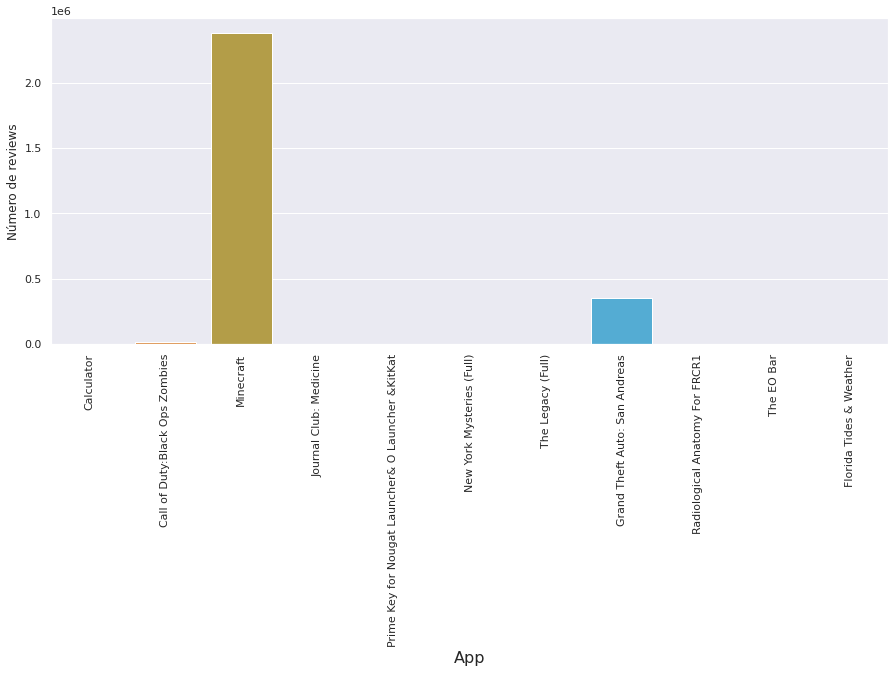

In [239]:
price_7 = google["Price"] == 6.99
price_7 = google[price_7]

sns.set_style('darkgrid')
plt.figure(figsize=[15, 6])
sns.set_context("notebook")
sns.barplot(x="App", y = "Reviews", data = price_7)
plt.xticks(rotation=90)
plt.xlabel("App", fontsize = 16)
plt.ylabel("Número de reviews")


Ese gran número de reviews, se debe a que "Minecraft", uno de lo juegos más descargados, tiene un precio de 6.99 y un número de reviews de 2.376.564, seguido de GTA SAn Andres con 348.962 reviews. Recordar que la media es de 216.000 reviews, por eso una aplicación con tan alto número de reviews dispara la media en la franja de 6.99 euros.

### Size - Price

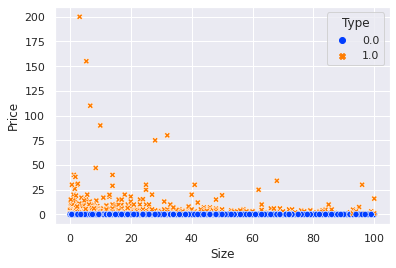

In [240]:
sns.scatterplot(x="Size", y="Price", hue = "Type", style = "Type", palette= "bright", data = google)

Las aplicaciones más ligeras tienden a tener un precio mayor que aquellas con mayor tamaño.

### Category - Genres

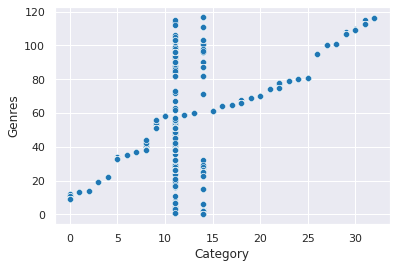

In [241]:
sns.scatterplot(x = "Category", y = "Genres", data=google)

Tanto la categoría 11: "Family" como la 14: "Games" tienen varios géneros asociados.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

<Figure size 2160x1080 with 0 Axes>

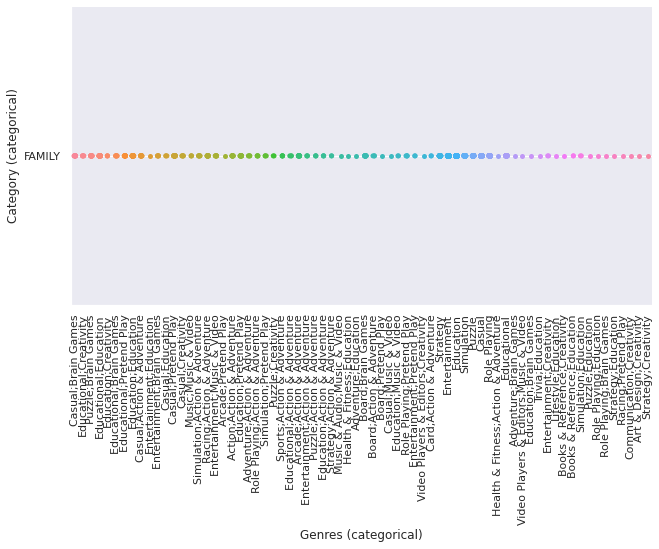

In [242]:
games = google["Category (categorical)"] == "FAMILY"
games = google[games]
plt.figure(figsize = (30, 15))
sns.catplot(x= "Genres (categorical)", y = "Category (categorical)", data = games, height= 5, aspect= 2)
plt.xticks(rotation=90)

In [243]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(google["Category (categorical)"], google["Genres (categorical)"])

0.9658492160741807

Existe una fuerte correlación (0.8) entre las variables "Category" y "Genres" de acuerdo a la matriz de correlación. Utilizando otra medida de la correlación de variables categóricas como es la de Cramer´s V, obtenemos un 0.966.

# Limpieza de datos

## Duplicados

Busqueda de filas duplicadas:

In [244]:
google.duplicated().sum()

0

Una vez analizadas las variables categóricas y observando que la mayoría están representadas por variables númericas, borro esas variables. 

In [245]:
google_cleaned = google.drop(["Category (categorical)", "Type (categorical)", "Genres (categorical)", "Current Ver (categorical)", "Android Ver (categorical)", "Last Updated (Year/Month) (categorical)"], axis = 1)
google_cleaned.head()

App  ...  Reviews_present_count
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...                      0
1                                Coloring book moana  ...                     44
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...                      0
3                              Sketch - Draw & Paint  ...                      0
4              Pixel Draw - Number Art Coloring Book  ...                      0

[5 rows x 17 columns]

Existen variables, que de forma implicita, está incluidas en otras categorías o,que simplemente, no son de utilidad para el análisis, como son: 
- App.
- Last Updated/Last Updated (year), incluídas en Last Updated (Year/Month).
- No_reviews_count.
- Reviews_present_count.

In [246]:
google_cleaned = google_cleaned.drop(["App", "Last Updated", "Last Updated (Year)", "No_reviews_count", "Reviews_present_count"], axis=1)
google_cleaned = google_cleaned.rename(columns = {"Last Updated (Year/Month)" : "Updated"})
google_cleaned.head()

Category  Rating  Reviews  Size  ...  Genres  Current Ver  Android Ver Updated
0       0.0     4.1      159  19.0  ...     9.0        118.0         15.0    80.0
1       0.0     3.9      967  14.0  ...    12.0       1015.0         15.0    80.0
2       0.0     4.7    87510   8.7  ...     9.0        464.0         15.0    87.0
3       0.0     4.5   215644  25.0  ...     9.0       2750.0         18.0    85.0
4       0.0     4.3      967   2.8  ...    11.0        277.0         20.0    85.0

[5 rows x 12 columns]

In [247]:
#Procesamos las variables categóricas y las convertimos en variables "dummies", para tratarlas así como variables cualitativas:
google_cleaned_dummies = pd.get_dummies(google_cleaned, columns = ["Content Rating"])
google_cleaned_dummies.head()

Category  Rating  ...  Content Rating_Mature 17+  Content Rating_Teen
0       0.0     4.1  ...                          0                    0
1       0.0     3.9  ...                          0                    0
2       0.0     4.7  ...                          0                    0
3       0.0     4.5  ...                          0                    1
4       0.0     4.3  ...                          0                    0

[5 rows x 16 columns]

In [248]:
#Para facilitar la consulta del dataframe, cambiamos el nombre de las columnas:
google_cleaned_dummies = google_cleaned_dummies.rename(columns = {"Content Rating_Adults only 18+" : "18+", "Content Rating_Everyone" : "Everyone", "Content Rating_Everyone 10+" : "10+", "Content Rating_Mature 17+" : "17+", "Content Rating_Teen" : "Teen"})

In [249]:
google_cleaned_dummies.head()

Category  Rating  Reviews  Size    Installs  ...  18+  Everyone  10+  17+  Teen
0       0.0     4.1      159  19.0     10000.0  ...    0         1    0    0     0
1       0.0     3.9      967  14.0    500000.0  ...    0         1    0    0     0
2       0.0     4.7    87510   8.7   5000000.0  ...    0         1    0    0     0
3       0.0     4.5   215644  25.0  50000000.0  ...    0         0    0    0     1
4       0.0     4.3      967   2.8    100000.0  ...    0         1    0    0     0

[5 rows x 16 columns]

In [250]:
#Tenemos los siguientes dataframes:
google_original = google
google_cleaned = google_cleaned
google = google_cleaned_dummies

##Valores nulos


In [251]:
google.isnull().sum()

Category          0
Rating         1461
Reviews           0
Size           1227
Installs          0
Type              0
Price             0
Genres            0
Current Ver       0
Android Ver       0
Updated           0
18+               0
Everyone          0
10+               0
17+               0
Teen              0
dtype: int64

Podemos observar que tenemos 1463 valores faltantes en la variable "Rating" y 1227 en la variable "Size".

Predicción de valores nulos de la variable "Rating", utilizando un modelo de regresión lineal.

In [252]:
#Eliminamos la columna "Size" porque contiene valores nulos. El modelo de regresión lineal no maneja valores nulos.
google_model = google.drop("Size", axis =1)
rating = google_model["Rating"]


#Utilizamos el modelo de regresión lineal:
lr = LinearRegression()

#Creamos las variables de test, train y la variable independiente. 
#La variable test contendrá los valores nulos, la train los valores no nulos y la "y" la columna "Rating" sin valores nulos.
test_rate = google_model[rating.isnull() == True]
train_rate = google_model[rating.isnull() == False]
y = train_rate["Rating"]

#Entranamos el modelo de regresión lineal:
train_rate.drop("Rating", axis = 1, inplace = True)
lr.fit(train_rate, y)

#Obtenemos los valores de "Rating" con el modelo:
test_rate.drop("Rating", axis = 1, inplace = True)
pred = lr.predict(test_rate)

#Sustituimos en test_rate, la columna "Rating" por los valos predichos:
test_rate["Rating"] = pred

test_rate["Rating"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0

In [253]:
google.loc[google.Rating.isnull(), "Rating"] = test_rate["Rating"]

In [254]:
google.isnull().sum()

Category          0
Rating            0
Reviews           0
Size           1227
Installs          0
Type              0
Price             0
Genres            0
Current Ver       0
Android Ver       0
Updated           0
18+               0
Everyone          0
10+               0
17+               0
Teen              0
dtype: int64

Predecimos los valores de "Size" de la misma forma que he hecho con "Rating": 

In [255]:
# Esta vez no hace falta eliminar "Rating" ya que no tiene valores nulos:
test_size = google[google["Size"].isnull() == True]
train_size = google[google["Size"].isnull() == False]
y = train_size["Size"]

#Entranamos el modelo de regresión lineal:
train_size.drop("Size", axis = 1, inplace = True)
lr.fit(train_size, y)

#Obtenemos los valores de "Size" con el modelo:
test_size.drop("Size", axis = 1, inplace = True)
pred_size = lr.predict(test_size)
test_size["Size"] = pred_size

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [256]:
google.loc[google.Size.isnull(), "Size"] = test_size["Size"]

Finalmente, observamos que el dataset no contiene ni valores nulos, ni repetidos.

##Transformación de características

Existen valores atípicos y con unidades en la muestra de datos. Para mejorar el modelo, conviene normalizar los datos y escalarlos. En caso de que sea necesario, se aplicarán las funciones Robust Scaler, para gestión de outliers, y Standard Scaler, para la normalización. Analizaremos las variables "Rating", "Reviews", "Size", "Price" y "Updated". 

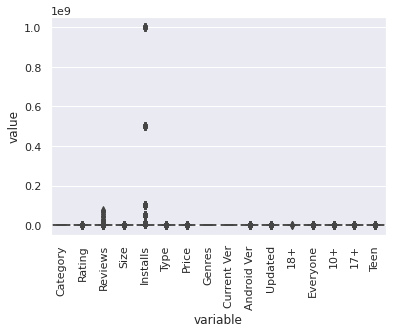

In [257]:
sns.boxplot(x="variable", y="value", data=pd.melt(google))
plt.xticks(rotation=90)
plt.show()

Vamos a seleccionar las variables continuas:

In [258]:
target = "Installs"
features = list(google.columns)
features.remove("Installs")

y = google[target]
x = google[features]

In [259]:
outliers = x.loc[:, ["Rating", "Reviews", "Size", "Price", "Updated", "Current Ver"]]
for val in outliers:
  column = np.array(outliers[val]).reshape(-1,1)
  scaler = RobustScaler().fit_transform(column)
  standard = StandardScaler().fit_transform(scaler)
  x [val] = standard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

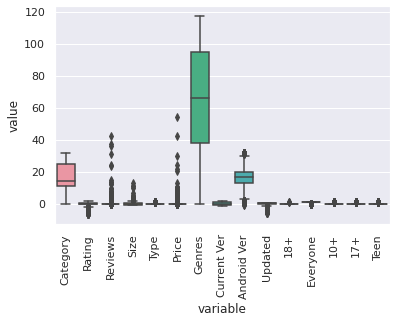

In [260]:
sns.boxplot(x="variable", y="value", data=pd.melt(x))
plt.xticks(rotation=90)
plt.show()

In [261]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_codified = le.fit_transform(y)

y_codified

array([ 9, 12, 14, ...,  7,  7, 15])

In [262]:
x.describe().transpose()

count          mean        std  ...        50%        75%         max
Category     9642.0  1.676519e+01   8.406279  ...  14.000000  25.000000   32.000000
Rating       9642.0 -4.617293e-16   1.000052  ...   0.054956   0.660554    1.669885
Reviews      9642.0 -6.030087e-16   1.000052  ...  -0.117851  -0.102298   42.525456
Size         9642.0 -4.071163e-16   1.000052  ...  -0.309641   0.364785   12.800645
Type         9642.0  7.664385e-02   0.266039  ...   0.000000   0.000000    1.000000
Price        9642.0 -2.618357e-16   1.000052  ...  -0.111458  -0.111458   54.257183
Genres       9642.0  6.378511e+01  32.379487  ...  66.000000  95.000000  117.000000
Current Ver  9642.0 -4.364068e-15   1.000052  ...  -0.205473   0.841822    1.741047
Android Ver  9642.0  1.694555e+01   6.968824  ...  17.000000  20.000000   32.000000
Updated      9642.0  9.088284e-15   1.000052  ...   0.486306   0.636252    0.711225
18+          9642.0  3.111388e-04   0.017637  ...   0.000000   0.000000    1.000000
Everyone     9642.0  8.180875e-01   0.385792  ...   1.000000   1.000000    1.000000
10+          9642.0  3.349927e-02   0.179946  ...   0.000000   0.000000    1.000000
17+          9642.0  4.075918e-02   0.197742  ...   0.000000   0.000000    1.000000
Teen         9642.0  1.073429e-01   0.309565  ...   0.000000   0.000000    1.000000

[15 rows x 8 columns]



---



---



#Ingeniería de Características

###Selección de variables

In [263]:
model = LinearRegression()

feature_order = []
feature_error = []

for i in range(len(features)):
  idx_try = [val for val in range(len(features)) if val not in feature_order]
  iter_error = []

  for i_try in idx_try:
    useRow = feature_order[:]
    useRow.append(i_try)
    use = x[x.columns[useRow]]
    model.fit(use,y)
    rmsError = np.linalg.norm((y - model.predict(use)), 2)/math.sqrt(len(y))
    iter_error.append(rmsError)
  
  pos_best = np.argmin(iter_error)
  feature_order.append(idx_try[pos_best])
  feature_error.append(iter_error[pos_best])

for i in range(len(features)):
  print("En el paso", i, "se ha insertado la variable", features[feature_order[i]], "con un error", feature_error[i])

En el paso 0 se ha insertado la variable Reviews con un error 41992454.60238139
En el paso 1 se ha insertado la variable Android Ver con un error 41706993.40934618
En el paso 2 se ha insertado la variable Size con un error 41637716.93992897
En el paso 3 se ha insertado la variable Current Ver con un error 41577121.89357837
En el paso 4 se ha insertado la variable Category con un error 41567063.487677276
En el paso 5 se ha insertado la variable Teen con un error 41558464.9672394
En el paso 6 se ha insertado la variable Everyone con un error 41549471.10292754
En el paso 7 se ha insertado la variable Genres con un error 41542601.34383458
En el paso 8 se ha insertado la variable Type con un error 41536775.446272485
En el paso 9 se ha insertado la variable Updated con un error 41531851.099358454
En el paso 10 se ha insertado la variable 17+ con un error 41531064.220034465
En el paso 11 se ha insertado la variable Price con un error 41531025.82263253
En el paso 12 se ha insertado la variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


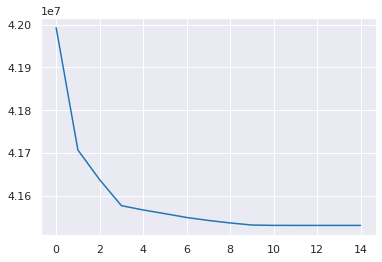

In [264]:
sns.lineplot(range(len(features)), feature_error)

Utilizando el Stepwise, podemos ver que un modelo con más de nueve características no va a obtener un peor resultado que uno con más características.

In [265]:
x = x.drop(["Updated", "17+", "Price", "18+", "Rating", "10+"], axis = 1)
x.head()

Category   Reviews      Size  Type  ...  Current Ver  Android Ver  Everyone  Teen
0       0.0 -0.118296 -0.124562   0.0  ...    -1.174950         15.0         1     0
1       0.0 -0.117855 -0.355910   0.0  ...    -0.205473         15.0         1     0
2       0.0 -0.070636 -0.601139   0.0  ...    -0.800993         15.0         1     0
3       0.0 -0.000725  0.153055   0.0  ...     1.669714         18.0         0     1
4       0.0 -0.117855 -0.874129   0.0  ...    -1.003103         20.0         1     0

[5 rows x 9 columns]

In [266]:
y = y_codified

#Selección de modelo

-	Regresión lineal - Hecho
-	Regresión logística.
-	Árboles de decisión.
-	Random forest.
-	Máquinas de vector de soporte (SVM).
-	Clasificadores bayesianos ingenuos (Naïve Bayes).


### Creación del conjunto de entrenamiento

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train

(6749, 9) (2893, 9) (6749,) (2893,)


array([ 7,  3, 13, ...,  6, 11,  6])

### Regresión lineal

In [268]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

predict_train = linear_regression.predict(x_train)
predict_test = linear_regression.predict(x_test)

In [269]:
print("R2 en entrenamiento es: ", linear_regression.score(x_train, y_train))
print("R2 en validación es: ", linear_regression.score(x_test, y_test))
print("Error cuadrático medios es:", mean_squared_error(predict_test, y_test))
print("Error absoluto medio es:", mean_absolute_error(predict_test, y_test))
print("Mediana del error absoulto es:", median_absolute_error(predict_test, y_test))

R2 en entrenamiento es:  0.29022554469188266
R2 en validación es:  0.2815692604296347
Error cuadrático medios es: 10.202393450704108
Error absoluto medio es: 2.5888725129752443
Mediana del error absoulto es: 2.254530484579595


### Regresión Logística

In [270]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

predict_train = logistic_regression.predict(x_train)
predict_test = logistic_regression.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [271]:
print("R2 en entrenamiento es: ", round(logistic_regression.score(x_train, y_train)*100,2))
print("R2 en validación es: ", round(logistic_regression.score(x_test, y_test)*100,2))
print("Error cuadrático medios es:", mean_squared_error(predict_test, y_test))
print("Error absoluto medio es:", mean_absolute_error(predict_test, y_test))
print("Mediana del error absoulto es:", median_absolute_error(predict_test, y_test))

R2 en entrenamiento es:  18.28
R2 en validación es:  19.22
Error cuadrático medios es: 13.448323539578292
Error absoluto medio es: 2.7438645005184927
Mediana del error absoulto es: 2.0


### Árboles de Decisión

In [272]:
decission_tree = DecisionTreeRegressor(max_depth=9)
decission_tree.fit(x_train,y_train)

predict_train = decission_tree.predict(x_train)
predict_test = decission_tree.predict(x_test)

In [273]:
print("R2 en entrenamiento es: ", decission_tree.score(x_train, y_train))
print("R2 en validación es: ", decission_tree.score(x_test, y_test))
print("Error cuadrático medios es:", mean_squared_error(predict_test, y_test))
print("Error absoluto medio es:", mean_absolute_error(predict_test, y_test))
print("Mediana del error absoulto es:", median_absolute_error(predict_test, y_test))

R2 en entrenamiento es:  0.9556677933052504
R2 en validación es:  0.9201893446136746
Error cuadrático medios es: 1.133386508902432
Error absoluto medio es: 0.769836888684027
Mediana del error absoulto es: 0.5652173913043477


### Random Forest

In [274]:
random_forest = RandomForestRegressor(max_depth=9)
random_forest.fit(x_train,y_train)

predict_train = random_forest.predict(x_train)
predict_test = random_forest.predict(x_test)

In [275]:
print("R2 en entrenamiento es: ", random_forest.score(x_train, y_train))
print("R2 en validación es: ", random_forest.score(x_test, y_test))
print("RMSE - Error cuadrático medios es:", mean_squared_error(predict_test, y_test))
print("MAE - Error absoluto medio es:", mean_absolute_error(predict_test, y_test))
print("Mediana del error absoulto es:", median_absolute_error(predict_test, y_test))

R2 en entrenamiento es:  0.9601819797809418
R2 en validación es:  0.9325463498801915
RMSE - Error cuadrático medios es: 0.9579053906017027
MAE - Error absoluto medio es: 0.7236160494192957
Mediana del error absoulto es: 0.5497666046028513


### Redes Neuronales

Comprobamos la dimensión de los tensores:

In [276]:
print("x_train:", x_train.shape, "dimensiones:", x_train.ndim,
      "\ny_train:", y_train.shape, "dimensiones:", y_train.ndim,
      "\n-----------------",
      "\nx_test:", x_test.shape, "dimensiones:", x_test.ndim,
      "\ny_test:", y_test.shape, "dimensiones:", y_test.ndim)

x_train: (6749, 9) dimensiones: 2 
y_train: (6749,) dimensiones: 1 
----------------- 
x_test: (2893, 9) dimensiones: 2 
y_test: (2893,) dimensiones: 1


Contamos con dos matrices de 6749 y 2893 filas y 9 columnas y dos vectores de 6749 y 2893 filas.

#### Definición del modelo

In [277]:
model = keras.Sequential()
model.add(Dense(64, activation = "relu", input_shape = [len(x_train.keys())]))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                640       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


#### Configuración del modelo

In [282]:
optimizer = keras.optimizers.RMSprop(0.001)
epochs = 500
model.compile(loss = "mse", optimizer = optimizer, metrics = ["mae", "mse"])

In [283]:
model.fit(x_train, y_train, epochs = epochs, validation_split = 0.2, verbose = 0)

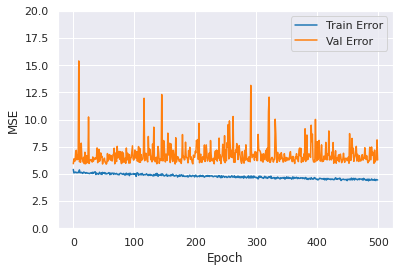

In [285]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(hist["epoch"], hist["mse"], label = "Train Error")
plt.plot(hist["epoch"], hist["val_mse"], label = "Val Error")
plt.legend()
plt.ylim([0,20])
plt.show()

In [286]:
loss, mse, mae = model.evaluate(x_test, y_test)
print("MSE - Error cuadrático medio", mse)
print("MAE - Error absoluto medio", mae)

91/91 [==============================] - 0s 2ms/step - loss: 6.7923 - mae: 2.0231 - mse: 6.7923
MSE - Error cuadrático medio 2.0230724811553955
MAE - Error absoluto medio 6.792270660400391
